<font color='red'>**Report Submission Information (must be completed before submitting report!)**</font>
* Student 1 Full Name and Number : Lei Qin 1048669
* Student 2 Full Name and Number : Liqing Wu 1037333
* Workshop day : Friday
* Workshop time : 2:15pm

# <font color='blue'> Workshop 3 – Deep Learning  [3 weeks] </font>

## Objectives:

* Gain hands-on experience with deep learning: deep neural networks and deep reinforcement learning. 
* Familiarise yourself with Python and Keras for _Deep Neural Networks (DNNs)_ as widely-used practical software tools.
* Familiarise yourself with some of the modern approaches used for deep reinforcement learning. 
* Basics of time series analysis relevant to engineering.
* Solve basic machine learning problems using DNNs and Keras library.
* Solve basic reinforcement learning problems.
* Connect theoretical knowledge and practical usage by doing it yourself.

> __Common objectives of all workshops:__
> Gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

## Overview:
The [history of artificial neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network#History) is full of ups and downs. People got excited about and ignored them multiple times since mid 20th century. As of early 21st century, artificial neural networks have enjoyed a big comeback in the form of [deep learning and DNNs](https://en.wikipedia.org/wiki/Deep_learning).  This last wave rides on important and un-ignorable trends including rapid advances in computing (CPUs, GPUs and specialised hardware), availability of sensors/data, and abundance of storage. While modern DNNs have already been applied to traditional problems in computer science such as image recognition and information retrieval with great success, their influence on engineering applications are only starting to be felt. 

In this workshop, you will learn about basics of time-series analysis and how to solve various machine learning problems using DNNs. Doing this yourself will give you a chance to connect theoretical knowledge and practical usage. We will start with some of the data sets we have used in the previous workshop, which will make it easier to compare and contrast different approaches. More interesting problems will be posed as open-ended (and optional).

You will also familiarise yourself with [Keras, Python Deep Learning Library](https://keras.io/), which is chosen for its popularity but most importantly ease-of-use. Keras often uses the underlying and more flexible [TensorFlow](https://www.tensorflow.org/) framework. As usual, the tools and data in this workshop are chosen completely for educational reasons (simplicity, accessibility, cost). There are and will be better Deep Learning frameworks and more complex data sets but it is not realistic to cover all in limited time.

> In the future, you should consider learning additional Deep Learning software packages and libraries. Finding the right tool for the right job is an important skill obtained through knowledge and experience. 




## Workshop Preparation: 

You can start your workshop early to learn much more! We will give you a lot of time to finish the tasks but those are the bare minimums. Just like in the lectures, the topics we cover in the workshops are quite deep and we can only do so much in two hours. There is much more to learn and being prepared for the workshop is one of the best ways to gain more knowledge! For example, you can easily answer some of the initial questions in each workshop by yourself.

> __Self-learning__ is one of the most important skills that you should acquire as a student. Today, self-learning is much easier than it used to be thanks to a plethora of online resources.
For this workshop, start by exploring the resource mentioned in the preparation steps below.

### Workshop Preparation Steps:

1. Common step for all workshops: read the Workshop Manual (Jupyter Notebook) beforehand!
2. Review relevant lecture slides on machine learning.
3. Read/check relevant reading material and links from Canvas
4. Check the embedded links below hints and background.
5. _\[optional\]_ _You can start with workshop tasks and questions_

### Additional packages to install

In this workshop, we will use Tensorflow and Keras. If you are using a lab computer, _it should be already there in your Anaconda environment (please check!)_. If not or you are using your own device, the best way to go forward is creating a new environment (e.g you can name it _tfenv_), which you can do in _Anaconda Navigator_ and then installing **tensorflow** on that environment.

Alternatively, you can create the environment using [these instructions](https://www.pugetsystems.com/labs/hpc/How-to-Install-TensorFlow-with-GPU-Support-on-Windows-10-Without-Installing-CUDA-UPDATED-1419/#Step3%29CreateaPython\) followed by the command
_conda install tensorflow-gpu_ or _conda install tensorflow-gpu_ in case you wish to make use your computer's [NVIDIA graphics card](https://www.tensorflow.org/install/gpu). Note that installing tensorflow in either case pulls all the necessary packages including scipy, scikit etc. *In case this does not happen install (scikit-learn, matplotlib, pandas) one by one.*

Another package we will need is [**statsmodels**](https://www.statsmodels.org). You can also install it directly using _Anaconda Navigator._ or following instructions on their website.

Ask for help from your demonstrator in case you need it.

**Don't forget to launch your notebook from the right environment!**

## Tasks and Questions:

Follow the procedures described below, perform the given tasks and answer the workshop questions __on the Python notebook itself!__ The marks associated with each question are clearly stated. Keep your answers to the point and complete to get full marks! Ensure that your code is clean and appropriately commented. 

__The resulting notebook will be your Workshop Report!__

> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from Internet, friends, etc.). You can and should use all available resources but only to develop your own understanding. If you copy-paste, you will pay the price in the final exam!__


**This workshop has 50 points.** 

# Section 1: DNNs for Classification

We will use first the now-familiar two-moon data set as an exercise for classifying with DNNs. This will help you to learn basics of Keras and deep learning on a problem which you have already solved with classical ML methods.

**Note** remember that Scikit Learn uses the [numpy random state](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html#numpy.random.seed). See the code below and uncomment as instructed for repeatable results.

### Important Note on Random Number/Vector Generation

**Each group has to use a different number seed (which is an arbitrary number as illustrated above) and groups cannot share seeds. The pseudo-randomness is used here to create diversity. Otherwise, if groups use the same seed, the results will be the same (opening the door to plagiarism) and significant number of points will be taken off! As a practical hint, you can use a modified-combination of your student numbers.**

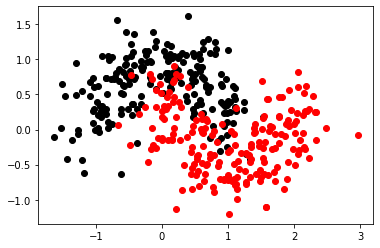

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# Set a random seed as you did in optimisation workshop by uncommenting the line below!
np.random.seed(5636994)

# Create a new moons data set
new_moons = datasets.make_moons(n_samples=400, noise=0.3)
Xm = new_moons[0] # data points
ym = new_moons[1] # 0, 1 labels of class, 200 each - giving us the ground truth

# Visualise the data set
order_ind = np.argsort(ym) # order labels, 200 each class
Xm1 = Xm[order_ind[0:200]]   # class 1 - only for visualisation
Xm2 = Xm[order_ind[201:400]] # class 2 - only for visualisation
plt.figure()
plt.scatter(Xm1[:,0], Xm1[:,1], color='black')
plt.scatter(Xm2[:,0], Xm2[:,1], color='red')
plt.show()

In [48]:
# split into training and test sets
Xmtrain, Xmtest, ymtrain, ymtest = train_test_split(Xm, ym)

## Example: DNN with Keras

We first create define our neural network (model) and compile it with an optimisation method, loss function, and metrics relevant to our problem. See the following documents as a starting point:
* Keras documentation, [guide to sequential model](https://www.tensorflow.org/guide/keras/sequential_model)
* [Tensorflow 2 Keras API](https://www.tensorflow.org/api_docs/python/tf/keras)

**We are now using Tensorflow 2 (TF2) but a lot of the online material is on TF1. Therefore, you cannot use those scripts directly anymore but it is easy to modify them to TF2!**

Older, additional information from web, e.g. [evaluating performance](https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/) and [Reduce Overfitting](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-neural-networks-with-weight-constraints-in-keras/)

### Reproducability and Pseudo-randomness

It is possible to get [reproducable results with Keras](https://machinelearningmastery.com/reproducible-results-neural-networks-keras/). However, this standard method (as implemented in the code below) works only with CPU implementation of tensorflow as far as I understand.

**Please don't forget to change the random seed in the code below and choose a group-specific arbitrary number as in previous workshops for full credit!**

If your computer uses CUDA/GPU, don't worry about reproducability for now. If you really wish to learn more about reproducability with CUDA/GPU _optionally_ you can have a look at [this project](https://github.com/NVIDIA/tensorflow-determinism).

In [8]:
%load_ext tensorboard
import datetime
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
#from tensorflow import keras

print(tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

2.4.1
GPU is NOT AVAILABLE


In [50]:
# CHANGE THE RANDOM SEED FOR YOUR GROUP!
np.random.seed(5636994)
tf.random.set_seed(5636994)

# Define the DNN sequential model

model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()

model.compile(
    optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()]
)

# log results
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_291 (Dense)            (None, 8)                 24        
_________________________________________________________________
dense_292 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_293 (Dense)            (None, 1)                 5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


Next, we train the DNN we have created using the training data.

In [51]:
# The command below continues training from where you left it! 
# If you wish to restart training from beginning rerun the cell above to reinitialise the model!

# Train the model, iterating on the data in batches, record history 
train_hist = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6393 - binary_accuracy: 0.6546
Epoch 2/100
19/19 [==============================] - 0s 858us/step - loss: 0.6102 - binary_accuracy: 0.7439
Epoch 3/100
19/19 [==============================] - 0s 863us/step - loss: 0.5987 - binary_accuracy: 0.7745
Epoch 4/100
19/19 [==============================] - 0s 946us/step - loss: 0.5962 - binary_accuracy: 0.7882
Epoch 5/100
19/19 [==============================] - 0s 859us/step - loss: 0.5820 - binary_accuracy: 0.8309
Epoch 6/100
19/19 [==============================] - 0s 946us/step - loss: 0.5770 - binary_accuracy: 0.8454
Epoch 7/100
19/19 [==============================] - 0s 910us/step - loss: 0.5753 - binary_accuracy: 0.8431
Epoch 8/100
19/19 [==============================] - 0s 863us/step - loss: 0.5506 - binary_accuracy: 0.8693
Epoch 9/100
19/19 [==============================] - 0s 944us/step - loss: 0.5529 - binary_accuracy: 0.8432
Epoch 10/100
19/19 [==========

Note that the accuracy and loss start from different values whenever you restart the model and you end up with a different final accuracy and loss values whenever you train it. This is due to random initialisation and local minimum solutions in training optimisation. However, since the _fit_ command is stateful and continues training from where it left, the results improve. How many epochs are needed to get over $90\%$ accuracy?

_If for some reason you wish to restart training from beginning rerun the previous cell to reinitialise the model!_

Below, we look at closer how the network looks like and trained weights.

In [52]:
print(model.summary())
weights = model.get_weights() # Getting params
print(weights)

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_291 (Dense)            (None, 8)                 24        
_________________________________________________________________
dense_292 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_293 (Dense)            (None, 1)                 5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
None
[array([[-0.45749933,  0.17212918, -0.33817482, -0.02736365,  0.22619902,
        -0.809951  ,  0.5264908 ,  0.75522786],
       [ 1.1782568 ,  0.43367818, -0.58901775,  0.22076836, -0.28638706,
        -0.5944451 , -0.4687189 ,  0.678147  ]], dtype=float32), array([ 0.4369984 ,  0.00910197, -0.2139479 ,  0.06324524,  0.2765997 ,
        0.09271988, -0.0906446 ,  0.03724777], dty

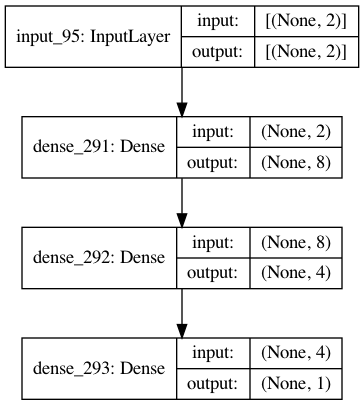

In [53]:
# Plot model graph
# you need to install pydot and graphviz via anaconda for this to work! restart notebook after installing these...
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

We can print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs. 

7/7 - 0s - loss: 0.4047 - binary_accuracy: 0.8300
[0.40468233823776245, 0.8299999833106995]


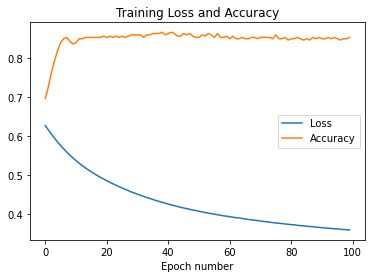

In [54]:
score = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)
print(score)

#train_hist.history

plt.figure()
plt.plot(train_hist.history['loss'])
plt.plot(train_hist.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

Finally, we compute and display the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). See also the [definition](https://en.wikipedia.org/wiki/Confusion_matrix). 

In [55]:
from sklearn.metrics import confusion_matrix

ympred = model.predict(Xmtest)
ympredbinary = (ympred > 0.5)

cm = confusion_matrix(ymtest, ympredbinary)

pd.DataFrame(cm, columns=["Pred 0", "Pred 1"], index=["True 0", "True 1"])

Pred 0  Pred 1
True 0      42       5
True 1      12      41

We can use the nice new tool tensorboard to analyse our results! Note the _log_ directory in the folder where you have run your script.

In [56]:
%tensorboard --logdir logs

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

### Question 1.1 (9 pts)

Use the same two-moon data $(Xm,ym)$ given above for deriving the training and test sets. You can use the default ratio as done before or change it a bit, e.g. $0.3$. The range of data values is OK so you can skip data normalisation.

1. Try different DNN structures instead of (8, 4, 1). For example, you can use only one hidden layer or many more layers. You can also use different activation functions as long as you end up with a single node binary classifier.  Try also different optimisers and loss functions. Which one works best? Try, observe, and discuss!
2. For the best network you prefer, investigate the impact of training epochs and batch sizes on DNN performance. Measure performance in different ways using the [metrics from Keras](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) or classical Machine Learning as discussed during ML lectures. You can use the same sklearn library functions as in WS2 to document performance (see e.g. above). Observe the difference between training and test set loss and accuracy. Interpret your results. What does a big difference between training and test set performance mean?
3. Try different [regularizers from Keras](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers) to prevent over-fitting. Document your results and observations. 

_Some resources from the web, which may or may not be relevant:_

* [Measuring performance and basics](https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/)
* [Weight constraints (different from regularisation)](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-neural-networks-with-weight-constraints-in-keras/)
* [A nice example](https://heartbeat.fritz.ai/introduction-to-deep-learning-with-keras-c7c3d14e1527)

**Note that** we are now using Tensorflow 2 which integrates Keras. Therefore, you probably cannot copy paste old scripts from web!

1. 1) First try a different DNN structure (more nodes in one layer) (10, 5, 1) with (relu, relu, sigmoid) as activation functions , SGD as the optimiser and BinaryCrossentropy as the loss function. Then we can get the results (loss = 0.3972, accuracy = 0.8400) which performs better than one with structure (8, 4, 1). <br/>
2) Next, only change the structure as (more layers)  (20, 10, 5, 1) and keep other settings the same, and we get the results (loss = 0.3833, accuracy = 0.8500). We can find add one hidden layer can either reduce the loss or improve the accuracy. <br/>
3) Next, again only change the activation functions in hidden layers as tanh, and we get the results (loss = 0.4165, accuracy = 0.8200). This means relu activation function used before is better than tanh function is this example. <br/>
4) Next, again only change the optimiser with Adam, and we get the results (loss = 0.2975, accuracy = 0.8700). Adan algorithm improves the accuracy, thus works better than SGD. <br/>
5) Last, again only change the loss function as MeanSquaredError, and we get the results (loss = 0.1313, accuracy = 0.8300). This is interesting, the loss function MSE is decreased but the accuracy also becomes lower than BinaryCrossentropy.

2. 1) Let's first use a DNN structure (10, 5, 1) with (relu, relu, sigmoid) as activation functions , SGD as the optimiser and BinaryCrossentropy as the loss function. Test with epochs=100, batch_size=16, we have the results (train acc = 0.87, test acc = 0.84). <br/>
2) Next only decrease the epoch with epochs=10, we have the results (train acc = 0.81, test acc = 0.79), which means underfitting with worse accuracy. <br/>
3) Then only increase the epoch with epochs=500, we have the results (train acc = 0.91, test acc = 0.85), which means overfitting since train accuracy is much larger than test accuracy. <br/>
4) Let's keep epochs=100 and decrease batch_size=1, we have the results (train acc = 0.91, test acc = 0.88), which means we improve the overfitting by a small batch size. Smaller batch sizes provide a regularization effect but introduce more time consumption. <br/>
5) Then again only increase batch_size=128, we have the results (train acc = 0.80, test acc = 0.76), which means large batch size may cause overfit and worsen the results.

3. 1) First try a kernel regularizer, and the results are (train acc = 0.86, test acc = 0.82). Usually, if you have no prior on the distribution that you wish to model, you would only use the kernel regularizer, since a large enough network can still model your function even if the regularization on the weights are big. <br/>
2) Next, try a bias regularizer, and the results are (train acc = 0.87, test acc = 0.84). If you want the output function to pass through (or have an intercept closer to) the origin, you can use the bias regularizer. <br/>
3) Then we try an activity regularizer, and the results are (train acc = 0.87, test acc = 0.84) If you want the output to be smaller (or closer to 0), you can use the activity regularizer.


In [57]:
from IPython.display import Markdown, display
from sklearn.metrics import classification_report

np.random.seed(5636994)
### Problem 1.1.1
display(Markdown(r"$Question\;1.1.1$"))

## Use only one hidden layer or many more layers
display(Markdown(r"Only use one hidden layer"))

# Define the DNN sequential model

model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# log results
# log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model, iterating on the data in batches, record history
train_hist1_1 = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

# print(model.summary())
# weights = model.get_weights()  # Getting params
# print(weights)

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score1_1 = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)


# ympred = model.predict(Xmtest)
# ympredbinary = (ympred > 0.5)

# cm = confusion_matrix(ymtest, ympredbinary)

# pd.DataFrame(cm, columns=["Pred 0", "Pred 1"], index=["True 0", "True 1"])
######################################################################################################################



######################################################################################################################
## Use two hidden layers
display(Markdown(r"Use two hidden layer"))

# Define the DNN sequential model

model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist1_2 = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score1_2 = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)
######################################################################################################################



######################################################################################################################
## Use different active function
display(Markdown(r"Use different active function"))

# Define the DNN sequential model

model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist1_3 = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score1_3 = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)
#########################################################################################################



######################################################################################################################
## Use different optimizer
display(Markdown(r"Use different optimizer"))

# Define the DNN sequential model

model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist1_4 = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score1_4 = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)
######################################################################################################################



######################################################################################################################
## Use different loss function
display(Markdown(r"Use different loss function"))

# Define the DNN sequential model

model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist1_5 = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score1_5 = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)
######################################################################################################################
######################################################################################################################




######################################################################################################################
######################################################################################################################
### Problem 1.1.2
display(Markdown(r"$Question\;1.1.2$"))

## epochs=100, batch_size=16
display(Markdown(r"epochs=100, batch_size=16"))

# Define the DNN sequential model
model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist2_1 = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score2_1 = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)

# Classification report
ytrainpred2_1 = np.ndarray.round(model.predict(Xmtrain))
ytestpred2_1 = np.ndarray.round(model.predict(Xmtest))
target_names = ['0', '1']
######################################################################################################################



######################################################################################################################
## epochs=10, batch_size=16
display(Markdown(r"epochs=10, batch_size=16"))

# Define the DNN sequential model
model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist2_2 = model.fit(Xmtrain, ymtrain, epochs=10, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score2_2 = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)

# Classification report
ytrainpred2_2 = np.ndarray.round(model.predict(Xmtrain))
ytestpred2_2 = np.ndarray.round(model.predict(Xmtest))
target_names = ['0', '1']
######################################################################################################################



######################################################################################################################
## epochs=500, batch_size=16
display(Markdown(r"epochs=500, batch_size=16"))

# Define the DNN sequential model
model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist2_3 = model.fit(Xmtrain, ymtrain, epochs=500, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score2_3 = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)

# Classification report
ytrainpred2_3 = np.ndarray.round(model.predict(Xmtrain))
ytestpred2_3 = np.ndarray.round(model.predict(Xmtest))
target_names = ['0', '1']
######################################################################################################################




######################################################################################################################
## epochs=100, batch_size=1
display(Markdown(r"epochs=100, batch_size=1"))

# Define the DNN sequential model
model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist2_4 = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=4, verbose=1, callbacks=[tensorboard_callback])

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score2_4 = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)

# Classification report
ytrainpred2_4 = np.ndarray.round(model.predict(Xmtrain))
ytestpred2_4 = np.ndarray.round(model.predict(Xmtest))
target_names = ['0', '1']
######################################################################################################################



######################################################################################################################
## epochs=100, batch_size=128
display(Markdown(r"epochs=100, batch_size=128"))

# Define the DNN sequential model
model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist2_5 = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=64, verbose=1, callbacks=[tensorboard_callback])

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score2_5 = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)

# Classification report
ytrainpred2_5 = np.ndarray.round(model.predict(Xmtrain))
ytestpred2_5 = np.ndarray.round(model.predict(Xmtest))
target_names = ['0', '1']
######################################################################################################################
######################################################################################################################




######################################################################################################################
######################################################################################################################
### Problem 1.1.3
display(Markdown(r"$Question\;1.1.3$"))

## kernel regularizer
display(Markdown(r"kernel regularizer"))

# Define the DNN sequential model
model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-5)))
model.add(Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-5)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-5)))

# model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist3_1 = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score3_1 = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)

# Classification report
ytrainpred3_1 = np.ndarray.round(model.predict(Xmtrain))
ytestpred3_1 = np.ndarray.round(model.predict(Xmtest))
target_names = ['0', '1']
######################################################################################################################




######################################################################################################################
## bias regularizer
display(Markdown(r"bias regularizer"))

# Define the DNN sequential model
model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(10, activation='relu', bias_regularizer=tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-5)))
model.add(Dense(5, activation='relu', bias_regularizer=tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-5)))
model.add(Dense(1, activation='sigmoid', bias_regularizer=tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-5)))

# model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist3_2 = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score3_2 = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)

# Classification report
ytrainpred3_2 = np.ndarray.round(model.predict(Xmtrain))
ytestpred3_2 = np.ndarray.round(model.predict(Xmtest))
target_names = ['0', '1']
######################################################################################################################




######################################################################################################################
## activity regularizer
display(Markdown(r"activity regularizer"))

# Define the DNN sequential model
model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(10, activation='relu', activity_regularizer=tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-5)))
model.add(Dense(5, activation='relu', activity_regularizer=tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-5)))
model.add(Dense(1, activation='sigmoid', activity_regularizer=tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-5)))

# model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist3_3 = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score3_3 = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)

# Classification report
ytrainpred3_3 = np.ndarray.round(model.predict(Xmtrain))
ytestpred3_3 = np.ndarray.round(model.predict(Xmtest))
target_names = ['0', '1']

$Question\;1.1.1$

Only use one hidden layer

Epoch 1/100
19/19 [==============================] - 0s 4ms/step - loss: 0.7299 - binary_accuracy: 0.3677
Epoch 2/100
19/19 [==============================] - 0s 866us/step - loss: 0.7244 - binary_accuracy: 0.3477
Epoch 3/100
19/19 [==============================] - 0s 764us/step - loss: 0.7143 - binary_accuracy: 0.4201
Epoch 4/100
19/19 [==============================] - 0s 775us/step - loss: 0.7048 - binary_accuracy: 0.4501
Epoch 5/100
19/19 [==============================] - 0s 837us/step - loss: 0.6995 - binary_accuracy: 0.4601
Epoch 6/100
19/19 [==============================] - 0s 854us/step - loss: 0.6937 - binary_accuracy: 0.5568
Epoch 7/100
19/19 [==============================] - 0s 771us/step - loss: 0.6856 - binary_accuracy: 0.5965
Epoch 8/100
19/19 [==============================] - 0s 861us/step - loss: 0.6799 - binary_accuracy: 0.5936
Epoch 9/100
19/19 [==============================] - 0s 811us/step - loss: 0.6710 - binary_accuracy: 0.6345
Epoch 10/100
19/19 [==========

Use two hidden layer

Epoch 1/100
19/19 [==============================] - 0s 4ms/step - loss: 0.7953 - binary_accuracy: 0.4943
Epoch 2/100
19/19 [==============================] - 0s 928us/step - loss: 0.6994 - binary_accuracy: 0.5752
Epoch 3/100
19/19 [==============================] - 0s 950us/step - loss: 0.6674 - binary_accuracy: 0.6629
Epoch 4/100
19/19 [==============================] - 0s 866us/step - loss: 0.6543 - binary_accuracy: 0.7003
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6364 - binary_accuracy: 0.6890
Epoch 6/100
19/19 [==============================] - 0s 969us/step - loss: 0.6264 - binary_accuracy: 0.7175
Epoch 7/100
19/19 [==============================] - 0s 867us/step - loss: 0.6272 - binary_accuracy: 0.7372
Epoch 8/100
19/19 [==============================] - 0s 891us/step - loss: 0.6106 - binary_accuracy: 0.7756
Epoch 9/100
19/19 [==============================] - 0s 821us/step - loss: 0.6051 - binary_accuracy: 0.7700
Epoch 10/100
19/19 [============

Use different active function

Epoch 1/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5928 - binary_accuracy: 0.7368
Epoch 2/100
19/19 [==============================] - 0s 898us/step - loss: 0.5504 - binary_accuracy: 0.7909
Epoch 3/100
19/19 [==============================] - 0s 891us/step - loss: 0.5055 - binary_accuracy: 0.8235
Epoch 4/100
19/19 [==============================] - 0s 793us/step - loss: 0.4721 - binary_accuracy: 0.8315
Epoch 5/100
19/19 [==============================] - 0s 841us/step - loss: 0.4614 - binary_accuracy: 0.8135
Epoch 6/100
19/19 [==============================] - 0s 901us/step - loss: 0.4491 - binary_accuracy: 0.8275
Epoch 7/100
19/19 [==============================] - 0s 898us/step - loss: 0.4332 - binary_accuracy: 0.8138
Epoch 8/100
19/19 [==============================] - 0s 936us/step - loss: 0.4193 - binary_accuracy: 0.8317
Epoch 9/100
19/19 [==============================] - 0s 830us/step - loss: 0.4085 - binary_accuracy: 0.8377
Epoch 10/100
19/19 [==========

Use different optimizer

Epoch 1/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6209 - binary_accuracy: 0.7888
Epoch 2/100
19/19 [==============================] - 0s 941us/step - loss: 0.6056 - binary_accuracy: 0.8223
Epoch 3/100
19/19 [==============================] - 0s 981us/step - loss: 0.5754 - binary_accuracy: 0.8415
Epoch 4/100
19/19 [==============================] - 0s 856us/step - loss: 0.5434 - binary_accuracy: 0.8479
Epoch 5/100
19/19 [==============================] - 0s 896us/step - loss: 0.5270 - binary_accuracy: 0.8248
Epoch 6/100
19/19 [==============================] - 0s 895us/step - loss: 0.4977 - binary_accuracy: 0.8426
Epoch 7/100
19/19 [==============================] - 0s 942us/step - loss: 0.4637 - binary_accuracy: 0.8205
Epoch 8/100
19/19 [==============================] - 0s 920us/step - loss: 0.4378 - binary_accuracy: 0.8438
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 0.4114 - binary_accuracy: 0.8499
Epoch 10/100
19/19 [============

Use different loss function

Epoch 1/100
19/19 [==============================] - 0s 3ms/step - loss: 0.2777 - binary_accuracy: 0.4940
Epoch 2/100
19/19 [==============================] - 0s 785us/step - loss: 0.2662 - binary_accuracy: 0.5442
Epoch 3/100
19/19 [==============================] - 0s 814us/step - loss: 0.2595 - binary_accuracy: 0.5360
Epoch 4/100
19/19 [==============================] - 0s 853us/step - loss: 0.2571 - binary_accuracy: 0.5178
Epoch 5/100
19/19 [==============================] - 0s 853us/step - loss: 0.2471 - binary_accuracy: 0.5479
Epoch 6/100
19/19 [==============================] - 0s 741us/step - loss: 0.2422 - binary_accuracy: 0.5412
Epoch 7/100
19/19 [==============================] - 0s 797us/step - loss: 0.2430 - binary_accuracy: 0.5239
Epoch 8/100
19/19 [==============================] - 0s 768us/step - loss: 0.2369 - binary_accuracy: 0.6029
Epoch 9/100
19/19 [==============================] - 0s 790us/step - loss: 0.2346 - binary_accuracy: 0.5726
Epoch 10/100
19/19 [==========

$Question\;1.1.2$

epochs=100, batch_size=16

Epoch 1/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6561 - binary_accuracy: 0.6877
Epoch 2/100
19/19 [==============================] - 0s 802us/step - loss: 0.6503 - binary_accuracy: 0.7230
Epoch 3/100
19/19 [==============================] - 0s 899us/step - loss: 0.6397 - binary_accuracy: 0.7310
Epoch 4/100
19/19 [==============================] - 0s 884us/step - loss: 0.6298 - binary_accuracy: 0.7447
Epoch 5/100
19/19 [==============================] - 0s 853us/step - loss: 0.6271 - binary_accuracy: 0.7627
Epoch 6/100
19/19 [==============================] - 0s 867us/step - loss: 0.6210 - binary_accuracy: 0.7669
Epoch 7/100
19/19 [==============================] - 0s 867us/step - loss: 0.6093 - binary_accuracy: 0.7553
Epoch 8/100
19/19 [==============================] - 0s 832us/step - loss: 0.5999 - binary_accuracy: 0.7935
Epoch 9/100
19/19 [==============================] - 0s 859us/step - loss: 0.5862 - binary_accuracy: 0.8005
Epoch 10/100
19/19 [==========

epochs=10, batch_size=16

Epoch 1/10
19/19 [==============================] - 0s 4ms/step - loss: 0.7848 - binary_accuracy: 0.4949
Epoch 2/10
19/19 [==============================] - 0s 891us/step - loss: 0.7326 - binary_accuracy: 0.5533
Epoch 3/10
19/19 [==============================] - 0s 860us/step - loss: 0.7067 - binary_accuracy: 0.5595
Epoch 4/10
19/19 [==============================] - 0s 853us/step - loss: 0.6855 - binary_accuracy: 0.5799
Epoch 5/10
19/19 [==============================] - 0s 902us/step - loss: 0.6511 - binary_accuracy: 0.6864
Epoch 6/10
19/19 [==============================] - 0s 880us/step - loss: 0.6347 - binary_accuracy: 0.7599
Epoch 7/10
19/19 [==============================] - 0s 925us/step - loss: 0.6244 - binary_accuracy: 0.7715
Epoch 8/10
19/19 [==============================] - 0s 833us/step - loss: 0.6038 - binary_accuracy: 0.7778
Epoch 9/10
19/19 [==============================] - 0s 835us/step - loss: 0.5867 - binary_accuracy: 0.8104
Epoch 10/10
19/19 [====================

epochs=500, batch_size=16

Epoch 1/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6546 - binary_accuracy: 0.5644
Epoch 2/500
19/19 [==============================] - 0s 1ms/step - loss: 0.6365 - binary_accuracy: 0.6083
Epoch 3/500
19/19 [==============================] - 0s 967us/step - loss: 0.6223 - binary_accuracy: 0.6175
Epoch 4/500
19/19 [==============================] - 0s 977us/step - loss: 0.6162 - binary_accuracy: 0.6502
Epoch 5/500
19/19 [==============================] - 0s 885us/step - loss: 0.5997 - binary_accuracy: 0.6605
Epoch 6/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5971 - binary_accuracy: 0.6828
Epoch 7/500
19/19 [==============================] - 0s 919us/step - loss: 0.5907 - binary_accuracy: 0.6658
Epoch 8/500
19/19 [==============================] - 0s 920us/step - loss: 0.5629 - binary_accuracy: 0.6880
Epoch 9/500
19/19 [==============================] - 0s 897us/step - loss: 0.5567 - binary_accuracy: 0.7476
Epoch 10/500
19/19 [==============

19/19 [==============================] - 0s 839us/step - loss: 0.3112 - binary_accuracy: 0.8617
Epoch 151/500
19/19 [==============================] - 0s 826us/step - loss: 0.3159 - binary_accuracy: 0.8460
Epoch 152/500
19/19 [==============================] - 0s 826us/step - loss: 0.3414 - binary_accuracy: 0.8483
Epoch 153/500
19/19 [==============================] - 0s 834us/step - loss: 0.3438 - binary_accuracy: 0.8551
Epoch 154/500
19/19 [==============================] - 0s 859us/step - loss: 0.3933 - binary_accuracy: 0.8408
Epoch 155/500
19/19 [==============================] - 0s 810us/step - loss: 0.3226 - binary_accuracy: 0.8510
Epoch 156/500
19/19 [==============================] - 0s 866us/step - loss: 0.2946 - binary_accuracy: 0.8671
Epoch 157/500
19/19 [==============================] - 0s 839us/step - loss: 0.3354 - binary_accuracy: 0.8460
Epoch 158/500
19/19 [==============================] - 0s 919us/step - loss: 0.2889 - binary_accuracy: 0.8787
Epoch 159/500
19/19 [===

19/19 [==============================] - 0s 921us/step - loss: 0.2449 - binary_accuracy: 0.8939
Epoch 299/500
19/19 [==============================] - 0s 970us/step - loss: 0.2764 - binary_accuracy: 0.8968
Epoch 300/500
19/19 [==============================] - 0s 783us/step - loss: 0.2883 - binary_accuracy: 0.8761
Epoch 301/500
19/19 [==============================] - 0s 822us/step - loss: 0.3228 - binary_accuracy: 0.8839
Epoch 302/500
19/19 [==============================] - 0s 821us/step - loss: 0.3061 - binary_accuracy: 0.8570
Epoch 303/500
19/19 [==============================] - 0s 798us/step - loss: 0.3011 - binary_accuracy: 0.8860
Epoch 304/500
19/19 [==============================] - 0s 886us/step - loss: 0.2681 - binary_accuracy: 0.8927
Epoch 305/500
19/19 [==============================] - 0s 839us/step - loss: 0.2777 - binary_accuracy: 0.9037
Epoch 306/500
19/19 [==============================] - 0s 809us/step - loss: 0.2924 - binary_accuracy: 0.8797
Epoch 307/500
19/19 [===

19/19 [==============================] - 0s 834us/step - loss: 0.2591 - binary_accuracy: 0.9220
Epoch 447/500
19/19 [==============================] - 0s 868us/step - loss: 0.2165 - binary_accuracy: 0.9238
Epoch 448/500
19/19 [==============================] - 0s 800us/step - loss: 0.2674 - binary_accuracy: 0.9163
Epoch 449/500
19/19 [==============================] - 0s 836us/step - loss: 0.2682 - binary_accuracy: 0.8916
Epoch 450/500
19/19 [==============================] - 0s 851us/step - loss: 0.2600 - binary_accuracy: 0.8938
Epoch 451/500
19/19 [==============================] - 0s 844us/step - loss: 0.2347 - binary_accuracy: 0.9215
Epoch 452/500
19/19 [==============================] - 0s 821us/step - loss: 0.2604 - binary_accuracy: 0.9065
Epoch 453/500
19/19 [==============================] - 0s 838us/step - loss: 0.2438 - binary_accuracy: 0.9137
Epoch 454/500
19/19 [==============================] - 0s 814us/step - loss: 0.2187 - binary_accuracy: 0.9019
Epoch 455/500
19/19 [===

epochs=100, batch_size=1

Epoch 1/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6516 - binary_accuracy: 0.5423
Epoch 2/100
75/75 [==============================] - 0s 663us/step - loss: 0.5806 - binary_accuracy: 0.8252
Epoch 3/100
75/75 [==============================] - 0s 655us/step - loss: 0.5366 - binary_accuracy: 0.8519
Epoch 4/100
75/75 [==============================] - 0s 651us/step - loss: 0.4766 - binary_accuracy: 0.8539
Epoch 5/100
75/75 [==============================] - 0s 676us/step - loss: 0.4771 - binary_accuracy: 0.8291
Epoch 6/100
75/75 [==============================] - 0s 655us/step - loss: 0.4535 - binary_accuracy: 0.8511
Epoch 7/100
75/75 [==============================] - 0s 663us/step - loss: 0.4334 - binary_accuracy: 0.8279
Epoch 8/100
75/75 [==============================] - 0s 667us/step - loss: 0.4199 - binary_accuracy: 0.8573
Epoch 9/100
75/75 [==============================] - 0s 658us/step - loss: 0.4349 - binary_accuracy: 0.8481
Epoch 10/100
75/75 [==========

epochs=100, batch_size=128

Epoch 1/100
5/5 [==============================] - 0s 18ms/step - loss: 0.7612 - binary_accuracy: 0.2324
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7491 - binary_accuracy: 0.2198
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7473 - binary_accuracy: 0.2342
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7410 - binary_accuracy: 0.1991
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7312 - binary_accuracy: 0.2354
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7255 - binary_accuracy: 0.2593
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7230 - binary_accuracy: 0.3099
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7127 - binary_accuracy: 0.3406
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7050 - binary_accuracy: 0.3836
Epoch 10/100
5/5 [==============================] - 0s 1ms/step

5/5 [==============================] - 0s 1ms/step - loss: 0.5500 - binary_accuracy: 0.7902
Epoch 80/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5347 - binary_accuracy: 0.8043
Epoch 81/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5497 - binary_accuracy: 0.7711
Epoch 82/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5431 - binary_accuracy: 0.7838
Epoch 83/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5370 - binary_accuracy: 0.7907
Epoch 84/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5299 - binary_accuracy: 0.8061
Epoch 85/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5376 - binary_accuracy: 0.7936
Epoch 86/100
5/5 [==============================] - 0s 995us/step - loss: 0.5247 - binary_accuracy: 0.8016
Epoch 87/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5286 - binary_accuracy: 0.7985
Epoch 88/100
5/5 [==============================] - 0s 1ms/step - 

$Question\;1.1.3$

kernel regularizer

Epoch 1/100
19/19 [==============================] - 1s 5ms/step - loss: 0.7328 - binary_accuracy: 0.5748
Epoch 2/100
19/19 [==============================] - 0s 930us/step - loss: 0.6994 - binary_accuracy: 0.5716
Epoch 3/100
19/19 [==============================] - 0s 941us/step - loss: 0.6615 - binary_accuracy: 0.6310
Epoch 4/100
19/19 [==============================] - 0s 977us/step - loss: 0.6188 - binary_accuracy: 0.7420
Epoch 5/100
19/19 [==============================] - 0s 981us/step - loss: 0.6049 - binary_accuracy: 0.8048
Epoch 6/100
19/19 [==============================] - 0s 822us/step - loss: 0.5712 - binary_accuracy: 0.8535
Epoch 7/100
19/19 [==============================] - 0s 886us/step - loss: 0.5589 - binary_accuracy: 0.8481
Epoch 8/100
19/19 [==============================] - 0s 875us/step - loss: 0.5411 - binary_accuracy: 0.8795
Epoch 9/100
19/19 [==============================] - 0s 999us/step - loss: 0.5235 - binary_accuracy: 0.8601
Epoch 10/100
19/19 [==========

bias regularizer

Epoch 1/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6579 - binary_accuracy: 0.6742
Epoch 2/100
19/19 [==============================] - 0s 817us/step - loss: 0.6282 - binary_accuracy: 0.7640
Epoch 3/100
19/19 [==============================] - 0s 839us/step - loss: 0.5937 - binary_accuracy: 0.7970
Epoch 4/100
19/19 [==============================] - 0s 813us/step - loss: 0.5666 - binary_accuracy: 0.8053
Epoch 5/100
19/19 [==============================] - 0s 842us/step - loss: 0.5645 - binary_accuracy: 0.7926
Epoch 6/100
19/19 [==============================] - 0s 900us/step - loss: 0.5435 - binary_accuracy: 0.8106
Epoch 7/100
19/19 [==============================] - 0s 810us/step - loss: 0.5300 - binary_accuracy: 0.7914
Epoch 8/100
19/19 [==============================] - 0s 860us/step - loss: 0.5219 - binary_accuracy: 0.8167
Epoch 9/100
19/19 [==============================] - 0s 822us/step - loss: 0.4986 - binary_accuracy: 0.8202
Epoch 10/100
19/19 [==========

activity regularizer

Epoch 1/100
19/19 [==============================] - 1s 5ms/step - loss: 0.6737 - binary_accuracy: 0.5412
Epoch 2/100
19/19 [==============================] - 0s 904us/step - loss: 0.6535 - binary_accuracy: 0.7558
Epoch 3/100
19/19 [==============================] - 0s 870us/step - loss: 0.6251 - binary_accuracy: 0.8569
Epoch 4/100
19/19 [==============================] - 0s 892us/step - loss: 0.6004 - binary_accuracy: 0.8728
Epoch 5/100
19/19 [==============================] - 0s 876us/step - loss: 0.5893 - binary_accuracy: 0.8602
Epoch 6/100
19/19 [==============================] - 0s 905us/step - loss: 0.5739 - binary_accuracy: 0.8403
Epoch 7/100
19/19 [==============================] - 0s 890us/step - loss: 0.5574 - binary_accuracy: 0.8337
Epoch 8/100
19/19 [==============================] - 0s 885us/step - loss: 0.5406 - binary_accuracy: 0.8402
Epoch 9/100
19/19 [==============================] - 0s 907us/step - loss: 0.5267 - binary_accuracy: 0.8627
Epoch 10/100
19/19 [==========

$Results:$

$Question\;1.1.1$

Only use one hidden layer

[0.3971896469593048, 0.8399999737739563]


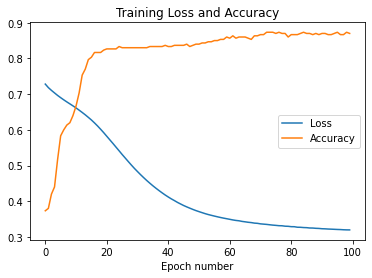

Use two hidden layer

[0.38330599665641785, 0.8500000238418579]


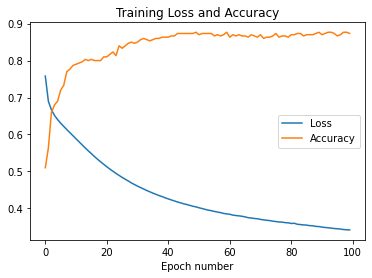

Use different active function

[0.41651999950408936, 0.8199999928474426]


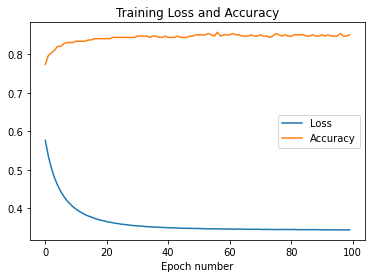

Use different optimizer

[0.2974834144115448, 0.8700000047683716]


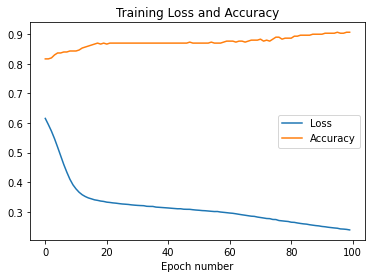

Use different loss function

[0.1312950849533081, 0.8299999833106995]


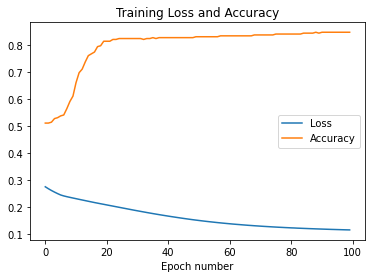

$Question\;1.1.2$

epochs=100, batch_size=16

[0.4024856686592102, 0.8399999737739563]


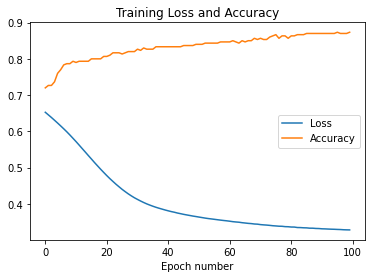

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       153
           1       0.88      0.86      0.87       147

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        47
           1       0.91      0.77      0.84        53

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.85      0.84      0.84       100



epochs=10, batch_size=16

[0.5808334946632385, 0.7900000214576721]


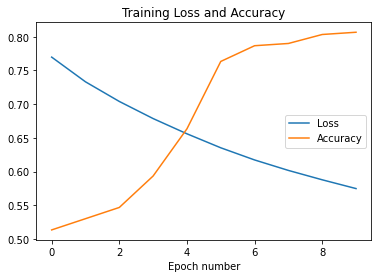

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       153
           1       0.79      0.83      0.81       147

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        47
           1       0.83      0.75      0.79        53

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100



epochs=500, batch_size=16

[0.3001832962036133, 0.8500000238418579]


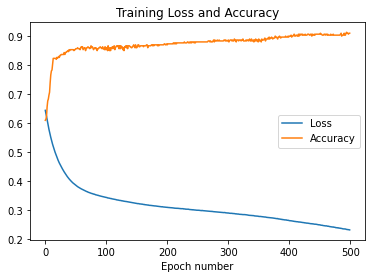

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       153
           1       0.93      0.88      0.90       147

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        47
           1       0.91      0.79      0.85        53

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.86      0.85      0.85       100



epochs=100, batch_size=1

[0.27485188841819763, 0.8799999952316284]


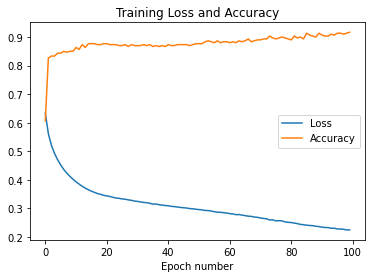

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       153
           1       0.92      0.90      0.91       147

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

              precision    recall  f1-score   support

           0       0.84      0.91      0.88        47
           1       0.92      0.85      0.88        53

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



epochs=100, batch_size=128

[0.5300109386444092, 0.7599999904632568]


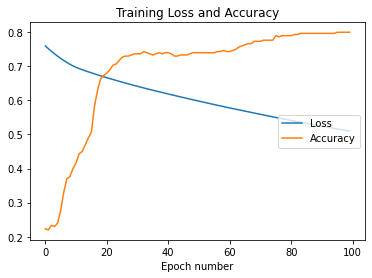

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       153
           1       0.77      0.84      0.80       147

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        47
           1       0.80      0.74      0.76        53

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100



$Question\;1.1.3$

kernel regularizer

[0.4073336720466614, 0.8199999928474426]


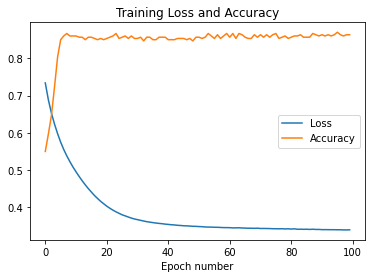

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       153
           1       0.85      0.86      0.86       147

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        47
           1       0.87      0.77      0.82        53

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100



bias regularizer

[0.41156017780303955, 0.8399999737739563]


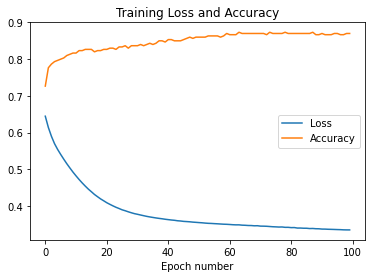

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       153
           1       0.87      0.85      0.86       147

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        47
           1       0.91      0.77      0.84        53

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.85      0.84      0.84       100



activity regularizer

[0.39787137508392334, 0.8399999737739563]


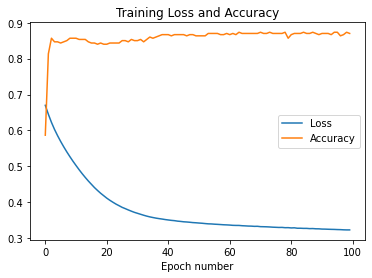

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       153
           1       0.87      0.86      0.87       147

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        47
           1       0.91      0.77      0.84        53

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.85      0.84      0.84       100



In [58]:
display(Markdown(r"$Results:$"))

### Problem 1.1.1
display(Markdown(r"$Question\;1.1.1$"))

## Use only one hidden layer or many more layers
display(Markdown(r"Only use one hidden layer"))

print(score1_1)

#train_hist.history

plt.figure()
plt.plot(train_hist1_1.history['loss'])
plt.plot(train_hist1_1.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

######################################################################################################################

## Use two hidden layers
display(Markdown(r"Use two hidden layer"))

print(score1_2)

#train_hist.history

plt.figure()
plt.plot(train_hist1_2.history['loss'])
plt.plot(train_hist1_2.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

######################################################################################################################

## Use different active function
display(Markdown(r"Use different active function"))

print(score1_3)

#train_hist.history

plt.figure()
plt.plot(train_hist1_3.history['loss'])
plt.plot(train_hist1_3.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

######################################################################################################################

## Use different optimizer
display(Markdown(r"Use different optimizer"))

print(score1_4)

#train_hist.history

plt.figure()
plt.plot(train_hist1_4.history['loss'])
plt.plot(train_hist1_4.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

######################################################################################################################

## Use different loss function
display(Markdown(r"Use different loss function"))

print(score1_5)

#train_hist.history

plt.figure()
plt.plot(train_hist1_5.history['loss'])
plt.plot(train_hist1_5.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()


######################################################################################################################
######################################################################################################################


### Problem 1.1.2
display(Markdown(r"$Question\;1.1.2$"))

## epochs=100, batch_size=16
display(Markdown(r"epochs=100, batch_size=16"))

print(score2_1)

#train_hist.history

plt.figure()
plt.plot(train_hist2_1.history['loss'])
plt.plot(train_hist2_1.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

print(classification_report(ymtrain, ytrainpred2_1, target_names=target_names))
print(classification_report(ymtest, ytestpred2_1, target_names=target_names))

######################################################################################################################

## epochs=10, batch_size=16
display(Markdown(r"epochs=10, batch_size=16"))

print(score2_2)

#train_hist.history

plt.figure()
plt.plot(train_hist2_2.history['loss'])
plt.plot(train_hist2_2.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

print(classification_report(ymtrain, ytrainpred2_2, target_names=target_names))
print(classification_report(ymtest, ytestpred2_2, target_names=target_names))

######################################################################################################################

## epochs=500, batch_size=16
display(Markdown(r"epochs=500, batch_size=16"))

print(score2_3)

#train_hist.history

plt.figure()
plt.plot(train_hist2_3.history['loss'])
plt.plot(train_hist2_3.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

print(classification_report(ymtrain, ytrainpred2_3, target_names=target_names))
print(classification_report(ymtest, ytestpred2_3, target_names=target_names))

######################################################################################################################

## epochs=100, batch_size=1
display(Markdown(r"epochs=100, batch_size=1"))

print(score2_4)

#train_hist.history

plt.figure()
plt.plot(train_hist2_4.history['loss'])
plt.plot(train_hist2_4.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

print(classification_report(ymtrain, ytrainpred2_4, target_names=target_names))
print(classification_report(ymtest, ytestpred2_4, target_names=target_names))

######################################################################################################################

## epochs=100, batch_size=128
display(Markdown(r"epochs=100, batch_size=128"))

print(score2_5)

#train_hist.history

plt.figure()
plt.plot(train_hist2_5.history['loss'])
plt.plot(train_hist2_5.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

print(classification_report(ymtrain, ytrainpred2_5, target_names=target_names))
print(classification_report(ymtest, ytestpred2_5, target_names=target_names))


######################################################################################################################
######################################################################################################################


### Problem 1.1.3
display(Markdown(r"$Question\;1.1.3$"))

## kernel regularizer
display(Markdown(r"kernel regularizer"))

print(score3_1)

#train_hist.history

plt.figure()
plt.plot(train_hist3_1.history['loss'])
plt.plot(train_hist3_1.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

print(classification_report(ymtrain, ytrainpred3_1, target_names=target_names))
print(classification_report(ymtest, ytestpred3_1, target_names=target_names))

######################################################################################################################

## bias regularizer
display(Markdown(r"bias regularizer"))

print(score3_2)

#train_hist.history

plt.figure()
plt.plot(train_hist3_2.history['loss'])
plt.plot(train_hist3_2.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

print(classification_report(ymtrain, ytrainpred3_2, target_names=target_names))
print(classification_report(ymtest, ytestpred3_2, target_names=target_names))

######################################################################################################################

## activity regularizer
display(Markdown(r"activity regularizer"))

print(score3_3)

#train_hist.history

plt.figure()
plt.plot(train_hist3_3.history['loss'])
plt.plot(train_hist3_3.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

print(classification_report(ymtrain, ytrainpred3_3, target_names=target_names))
print(classification_report(ymtest, ytestpred3_3, target_names=target_names))

### Question 1.2 (6 pts) Wireless Indoor Localization _revisited_

We now revisit the wireless indoor localisation [dataset](http://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization) from WS2. Remember that the data shows the recorded signal strength from 7 different base stations at a smart phone. The phone is in one of the four rooms {1, 2, 3, 4}. The goal is to classify the location of the phone to one of the four rooms.

1. Solve this classification problem with a DNN. Determine appropriate input and output layers and experiment with different number/structures of hidden layers. _Hint: you can use, e.g., two sigmoid outputs to binary encode four classes._
2. Measure performance in different ways using the metrics from Keras or classical Machine Learning as discussed during ML lectures. You can use the same sklearn library functions as in WS2 to document performance. Discuss your findings.

In [59]:
dataw = pd.read_csv('files/wifi_localization.csv', names=[f"s{i}" for i in range(1, 8)] + ['Room Number'])
dataw.head() # comment one to see the other
dataw.tail()

s1  s2  s3  s4  s5  s6  s7  Room Number
1995 -59 -59 -48 -66 -50 -86 -94            4
1996 -59 -56 -50 -62 -47 -87 -90            4
1997 -62 -59 -46 -65 -45 -87 -88            4
1998 -62 -58 -52 -61 -41 -90 -85            4
1999 -59 -50 -45 -60 -45 -88 -87            4

In [60]:
print(dataw.size, dataw.shape)

16000 (2000, 8)


In [61]:
SRI = dataw.iloc[:,:7]
# a.shape
loc = dataw.iloc[:,7]-1 
# loc.shape

# split into training and test sets
SRItrain, SRItest, loctrain, loctest = train_test_split(SRI, loc)

1. Seperately use 3 different structures with layers (20, 12, 8, 2), (20, 2), (6, 4, 2) to solve this classification problem with two sigmoid outputs to binary encode four classes. The results shows below.
2. Use loss, accuracy , ROC AUC and curves for different labels. We can find that for structures with layers (20, 12, 8, 2) is better than other 2 structures with ROC AUC=0.982 v.s. 0.975 (layers (20, 2)) v.s. 0.963 (layers (6, 4, 2)). The ROC curves below also show this results.

$Question\;1.2.1$

structure 1 layers: 20, 12, 8, 2

structure 2 layers: 20, 2

structure 3 layers: 6, 4, 2

$Question\;1.2.2$

structure 1 layers: 20, 12, 8, 2

[0.05653905123472214, 0.9769999980926514]


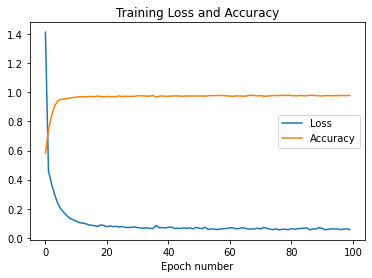

Train: ROC AUC=0.982
Test: ROC AUC=0.982


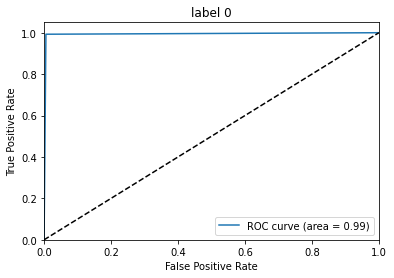

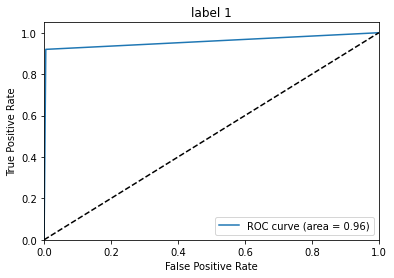

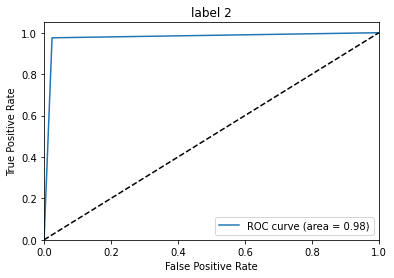

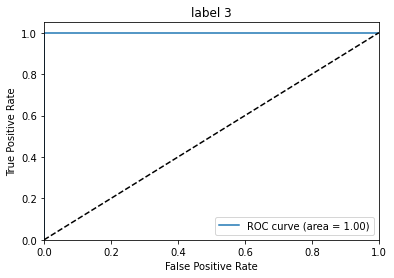

structure 2 layers: 20, 2

[0.06520116329193115, 0.9739999771118164]


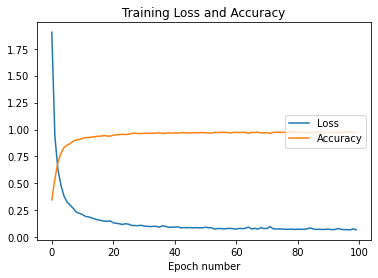

Train: ROC AUC=0.979
Test: ROC AUC=0.975


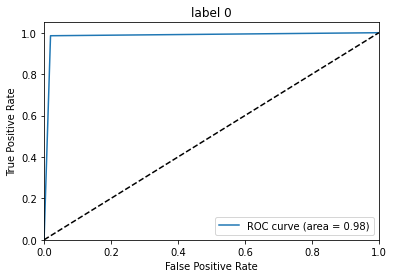

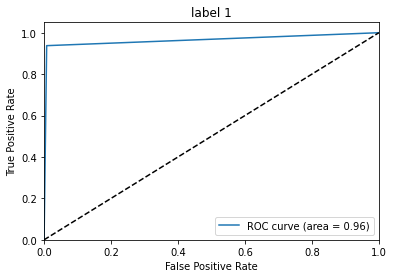

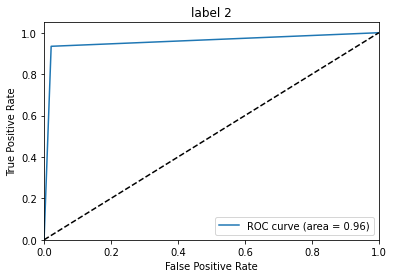

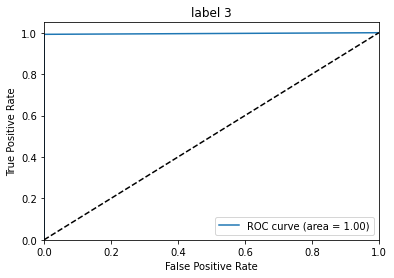

structure 3 layers: 6, 4, 2

[0.10027632117271423, 0.9620000123977661]


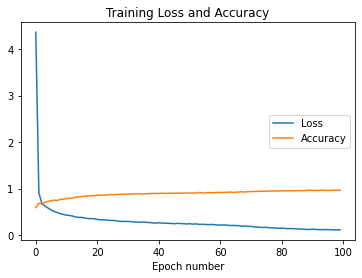

Train: ROC AUC=0.964
Test: ROC AUC=0.963


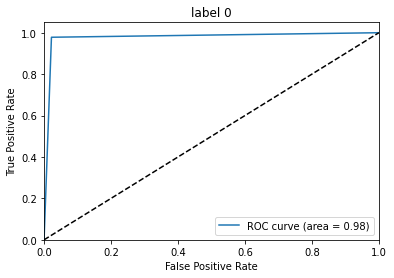

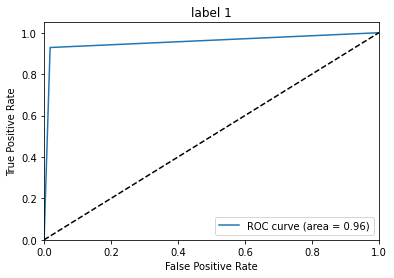

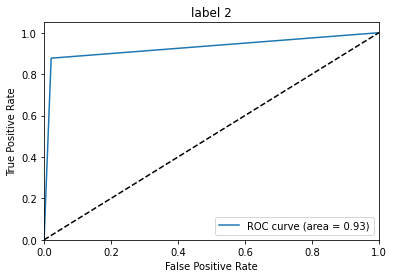

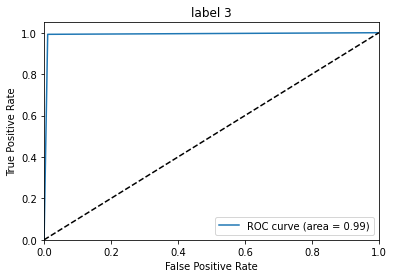

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# loc to bin
# loc = loc.to_numpy()
locBin = np.array([list(np.binary_repr(x, 2)) for x in loc], dtype=int)

# split into training and test sets
SRItrain, SRItest, loctrain, loctest = train_test_split(SRI, locBin)

# Set a random seed as you did in optimisation workshop by uncommenting the line below!
np.random.seed(5636994)

### Problem 1.2.1
display(Markdown(r"$Question\;1.2.1$"))

## structure 1
display(Markdown(r"structure 1 layers: 20, 12, 8, 2"))

# Define the DNN sequential model

model1 = Sequential()
model1.add(tf.keras.Input(shape=(7,)))
model1.add(Dense(20, activation='relu'))
model1.add(Dense(12, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(2, activation='sigmoid'))

model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist1 = model1.fit(SRItrain, loctrain, epochs=100, batch_size=16, verbose=0)

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score1 = model1.evaluate(SRItest, loctest, batch_size=16, verbose=0)

    
######################################################################################################################

## structure 2
display(Markdown(r"structure 2 layers: 20, 2"))

# Define the DNN sequential model

model2 = Sequential()
model2.add(tf.keras.Input(shape=(7,)))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(2, activation='sigmoid'))

model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist2 = model2.fit(SRItrain, loctrain, epochs=100, batch_size=16, verbose=0)

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score2 = model2.evaluate(SRItest, loctest, batch_size=16, verbose=0)

######################################################################################################################

## structure 3
display(Markdown(r"structure 3 layers: 6, 4, 2"))

# Define the DNN sequential model

model3 = Sequential()
model3.add(tf.keras.Input(shape=(7,)))
model3.add(Dense(6, activation='relu'))
model3.add(Dense(4, activation='relu'))
model3.add(Dense(2, activation='sigmoid'))

model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# Train the model, iterating on the data in batches, record history
train_hist3 = model3.fit(SRItrain, loctrain, epochs=100, batch_size=16, verbose=0)

# Print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs
score3 = model3.evaluate(SRItest, loctest, batch_size=16, verbose=0)

######################################################################################################################
######################################################################################################################
### Problem 1.2.2
display(Markdown(r"$Question\;1.2.2$"))

## structure 1
display(Markdown(r"structure 1 layers: 20, 12, 8, 2"))

print(score1)

# Train_hist.history

plt.figure()
plt.plot(train_hist1.history['loss'])
plt.plot(train_hist1.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

# Classification results
loctrainpred = np.ndarray.round(model1.predict(SRItrain))
loctestpred = np.ndarray.round(model1.predict(SRItest))

# Results binary to decimal
b2d = 1 << np.arange(loctrain.shape[-1] - 1, -1, -1)
loctrain = np.rint(loctrain.dot(b2d)).reshape(-1, 1)
loctrainpred = np.rint(loctrainpred.dot(b2d)).reshape(-1, 1)
loctest = np.rint(loctest.dot(b2d)).reshape(-1, 1)
loctestpred = np.rint(loctestpred.dot(b2d)).reshape(-1, 1)


# Results decimal to one-hot encoding
def d2ih(loc):
    loc1Hot = np.zeros((loc.size, loc.max() + 1))
    for i in np.arange(loc.size):
        loc1Hot[i, loc[i]] = 1
    return loc1Hot


loctrain = d2ih(loctrain.astype(int))
loctrainpred = d2ih(loctrainpred.astype(int))
loctest = d2ih(loctest.astype(int))
loctestpred = d2ih(loctestpred.astype(int))

# Calculate scores
train_auc = roc_auc_score(loctrain, loctrainpred, multi_class='ovr')
test_auc = roc_auc_score(loctest, loctestpred, multi_class='ovr')

# Summarize scores
print('Train: ROC AUC=%.3f' % train_auc)
print('Test: ROC AUC=%.3f' % test_auc)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(loctest[:, i], loctestpred [:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('label %d' % i)
    plt.legend(loc="lower right")
    plt.show()

######################################################################################################################

## structure 2
display(Markdown(r"structure 2 layers: 20, 2"))

print(score2)

# Train_hist.history

plt.figure()
plt.plot(train_hist2.history['loss'])
plt.plot(train_hist2.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

# Classification results
loctrainpred = np.ndarray.round(model2.predict(SRItrain))
loctestpred = np.ndarray.round(model2.predict(SRItest))

# Results binary to decimal
# b2d = 1 << np.arange(loctrain.shape[-1] - 1, -1, -1)
# loctrain = np.rint(loctrain.dot(b2d)).reshape(-1, 1)
loctrainpred = np.rint(loctrainpred.dot(b2d)).reshape(-1, 1)
# loctest = np.rint(loctest.dot(b2d)).reshape(-1, 1)
loctestpred = np.rint(loctestpred.dot(b2d)).reshape(-1, 1)


# Results decimal to one-hot encoding
def d2ih(loc):
    loc1Hot = np.zeros((loc.size, loc.max() + 1))
    for i in np.arange(loc.size):
        loc1Hot[i, loc[i]] = 1
    return loc1Hot


# loctrain = d2ih(loctrain.astype(int))
loctrainpred = d2ih(loctrainpred.astype(int))
# loctest = d2ih(loctest.astype(int))
loctestpred = d2ih(loctestpred.astype(int))

# Calculate scores
train_auc = roc_auc_score(loctrain, loctrainpred, multi_class='ovr')
test_auc = roc_auc_score(loctest, loctestpred, multi_class='ovr')

# Summarize scores
print('Train: ROC AUC=%.3f' % train_auc)
print('Test: ROC AUC=%.3f' % test_auc)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(loctest[:, i], loctestpred [:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('label %d' % i)
    plt.legend(loc="lower right")
    plt.show()
    
######################################################################################################################

## structure 3
display(Markdown(r"structure 3 layers: 6, 4, 2"))

print(score3)

# Train_hist.history

plt.figure()
plt.plot(train_hist3.history['loss'])
plt.plot(train_hist3.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

# Classification results
loctrainpred = np.ndarray.round(model3.predict(SRItrain))
loctestpred = np.ndarray.round(model3.predict(SRItest))

# Results binary to decimal
# b2d = 1 << np.arange(loctrain.shape[-1] - 1, -1, -1)
# loctrain = np.rint(loctrain.dot(b2d)).reshape(-1, 1)
loctrainpred = np.rint(loctrainpred.dot(b2d)).reshape(-1, 1)
# loctest = np.rint(loctest.dot(b2d)).reshape(-1, 1)
loctestpred = np.rint(loctestpred.dot(b2d)).reshape(-1, 1)


# Results decimal to one-hot encoding
def d2ih(loc):
    loc1Hot = np.zeros((loc.size, loc.max() + 1))
    for i in np.arange(loc.size):
        loc1Hot[i, loc[i]] = 1
    return loc1Hot


# loctrain = d2ih(loctrain.astype(int))
loctrainpred = d2ih(loctrainpred.astype(int))
# loctest = d2ih(loctest.astype(int))
loctestpred = d2ih(loctestpred.astype(int))

# Calculate scores
train_auc = roc_auc_score(loctrain, loctrainpred, multi_class='ovr')
test_auc = roc_auc_score(loctest, loctestpred, multi_class='ovr')

# Summarize scores
print('Train: ROC AUC=%.3f' % train_auc)
print('Test: ROC AUC=%.3f' % test_auc)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(loctest[:, i], loctestpred [:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('label %d' % i)
    plt.legend(loc="lower right")
    plt.show()

# Section 2: Time Series Estimation

We will next use household electrical power demand as an interesting time-series, which is relevant to power systems and electrical engineering.

## Electrical Power Household Demand Estimation


Estimating household power consumption is an important problem in power systems. The demand estimation is easy at the state or regional level due to low-pass filtering (or law of large numbers) effect of adding thousands or even millions customers' demand. The problem is much more challenging when the demand of individual houses are studied. It is almost impossible to predict when someone is going to boil water in the kettle or take a shower at home. However, it is still possible to make good estimates.

We are given the yearly power consumption of two houses.

In [63]:
raw_data = pd.read_csv('files/two_houses.csv')
raw_data.head()

day       time  house1  house2
0    0  SMAPV3001   0.288   0.150
1    0  SMAPV3002   0.394   0.081
2    0  SMAPV3003   0.238   0.094
3    0  SMAPV3004   0.138   0.081
4    0  SMAPV3005   0.094   0.075

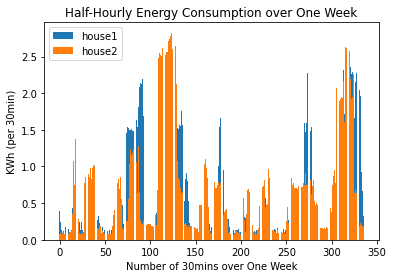

((17567,), (17567,))

In [64]:
house1 = raw_data.iloc[1:,2]
house2 = raw_data.iloc[1:,3]

plt.figure()
plt.bar(np.arange(48*7),house1[0:48*7])
plt.bar(np.arange(48*7),house2[0:48*7])
plt.title('Half-Hourly Energy Consumption over One Week')
plt.xlabel('Number of 30mins over One Week')
plt.ylabel('KWh (per 30min)')
plt.legend(['house1','house2'])
plt.show()

house1.shape, house2.shape

### Question 2.1 (8 pts) Time Series Estimation using ARMA Models

Use ARMA linear estimation method to estimate the power consumption of house 1 and house 2. You can use [statsmodel time series analysis tools](https://www.statsmodels.org/stable/tsa.html) for this. 

1. Define and fit an ARMA model for the first 960 data points. Next, forecast the next 48 points. Measure your performance, e.g. in terms of Mean-squared Error (MSE) using [statsmodels tools](https://www.statsmodels.org/stable/tools.html#measure-for-fit-performance-eval-measures), and plot results.
2. Try different AR and MA degrees and different data/time windows. Document and discuss your observations.

_Hints_: see [ARIMA model](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html), [ARIMA results](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.html), and [ARIMA example](https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_1.html)

This is an [alternative example implementation.](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

**Pointers for solution**

* Use ARIMA model with order (p, 0, q) for implementing a pure ARMA model. [ARIMA](https://otexts.com/fpp2/arima.html) differs from ARMA. 
* Specific commands to use are [ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) for creating the model and [ARIMA.fit](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.fit.html) with appropriate arguments as documented.
* After training, [ARIMAResults](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.html) functions such as _summary()_ , _fittedvalues_, _params_, and _forecast(steps=nbrsteps)_ will be very useful.

In [108]:
from statsmodels.tsa.arima_model import ARIMA

1. If we want to get a relatively reasonable output, we need to set the value of q about 48, because 48 is a circle period of house1 and 2. But we cannot use this value because it takes too much time to get the result.<br/>
1) For house 1: Mean-squared Error (MSE) is about 0.074 and the plot is shown below;<br/> 2) For house 2: Mean-squared Error (MSE) is about 0 and the plot is shown below.
2. 1) If we decrease the AR degree, MSE is incresed to 0.324 and 0.03 for house 1 and 2; if we increase the AR dgree, MSE is decreased to 0.037 for house 1. Since MSE for house 2 is 0 in previous question, we cannot increase its AR degree.<br/>  2)If we decrease the MA degree, MSE is incresed to 0.076 for house 1 and is kept around 0 for house 2; if we increase the AR dgree, MSE is kept around 0.074 for house 1. Since MSE for house 2 is 0 in previous question, we cannot increase its MA degree.<br/> 
3) If we decrease the data/time windows, MSE is incresed to 0.075 and 0.357 for house 1 and 2. Vice versa.


$Question\;2.1.1$

House 1

                              ARMA Model Results                              
Dep. Variable:                 house1   No. Observations:                  960
Model:                     ARMA(1, 1)   Log Likelihood                 186.806
Method:                       css-mle   S.D. of innovations              0.199
Date:                Sat, 22 May 2021   AIC                           -365.613
Time:                        13:11:46   BIC                           -346.145
Sample:                             0   HQIC                          -358.199
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3834      0.073      5.224      0.000       0.240       0.527
ar.L1.house1     0.9071      0.015     62.183      0.000       0.879       0.936
ma.L1.house1     0.0723      0.034      2.11

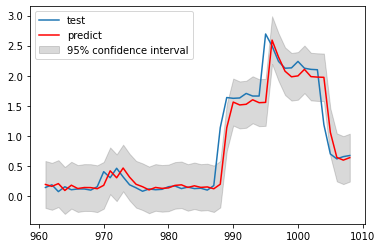

House 2

                              ARMA Model Results                              
Dep. Variable:                 house2   No. Observations:                  960
Model:                     ARMA(1, 1)   Log Likelihood                 311.638
Method:                       css-mle   S.D. of innovations              0.175
Date:                Sat, 22 May 2021   AIC                           -615.276
Time:                        13:11:52   BIC                           -595.808
Sample:                             0   HQIC                          -607.862
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5162      0.081      6.405      0.000       0.358       0.674
ar.L1.house2     0.9305      0.012     74.606      0.000       0.906       0.955
ma.L1.house2     0.0072      0.033      0.21

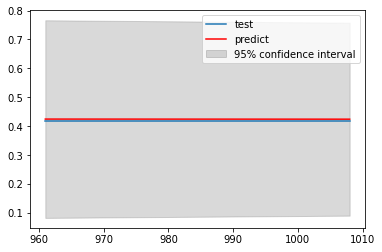

$Question\;2.1.2$

Change AR degrees

House 1

                              ARMA Model Results                              
Dep. Variable:                 house1   No. Observations:                  960
Model:                     ARMA(0, 1)   Log Likelihood                -294.254
Method:                       css-mle   S.D. of innovations              0.329
Date:                Sat, 22 May 2021   AIC                            594.507
Time:                        13:11:57   BIC                            609.108
Sample:                             0   HQIC                           600.067
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3852      0.018     20.875      0.000       0.349       0.421
ma.L1.house1     0.7404      0.015     49.822      0.000       0.711       0.770
                                    Roots   

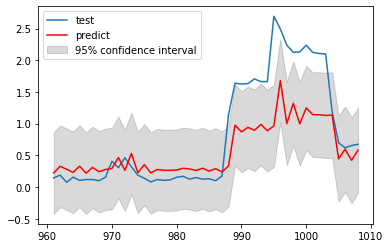

                              ARMA Model Results                              
Dep. Variable:                 house1   No. Observations:                  960
Model:                     ARMA(2, 1)   Log Likelihood                 188.594
Method:                       css-mle   S.D. of innovations              0.199
Date:                Sat, 22 May 2021   AIC                           -367.188
Time:                        13:12:00   BIC                           -342.853
Sample:                             0   HQIC                          -357.921
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3841      0.060      6.452      0.000       0.267       0.501
ar.L1.house1     1.7694      0.116     15.229      0.000       1.542       1.997
ar.L2.house1    -0.7900      0.105     -7.55

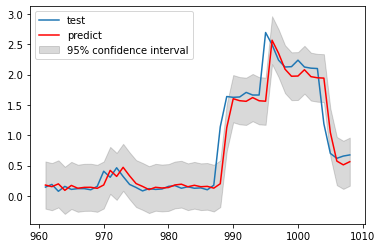

House 2

                              ARMA Model Results                              
Dep. Variable:                 house2   No. Observations:                  960
Model:                     ARMA(0, 1)   Log Likelihood                -231.660
Method:                       css-mle   S.D. of innovations              0.308
Date:                Sat, 22 May 2021   AIC                            469.319
Time:                        13:12:14   BIC                            483.920
Sample:                             0   HQIC                           474.879
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5234      0.018     29.813      0.000       0.489       0.558
ma.L1.house2     0.7676      0.015     50.276      0.000       0.738       0.798
                                    Roots   

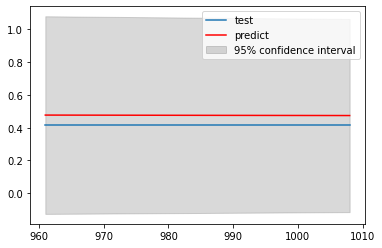

Change MA degrees

House 1

                              ARMA Model Results                              
Dep. Variable:                 house1   No. Observations:                  960
Model:                     ARMA(1, 0)   Log Likelihood                 184.585
Method:                       css-mle   S.D. of innovations              0.199
Date:                Sat, 22 May 2021   AIC                           -363.169
Time:                        13:12:17   BIC                           -348.569
Sample:                             0   HQIC                          -357.609
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3830      0.078      4.920      0.000       0.230       0.536
ar.L1.house1     0.9183      0.013     72.643      0.000       0.893       0.943
                                    Roots   

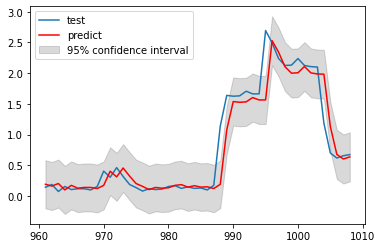

                              ARMA Model Results                              
Dep. Variable:                 house1   No. Observations:                  960
Model:                     ARMA(1, 2)   Log Likelihood                 187.011
Method:                       css-mle   S.D. of innovations              0.199
Date:                Sat, 22 May 2021   AIC                           -364.022
Time:                        13:12:18   BIC                           -339.687
Sample:                             0   HQIC                          -354.755
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3835      0.072      5.315      0.000       0.242       0.525
ar.L1.house1     0.9033      0.016     56.034      0.000       0.872       0.935
ma.L1.house1     0.0768      0.036      2.14

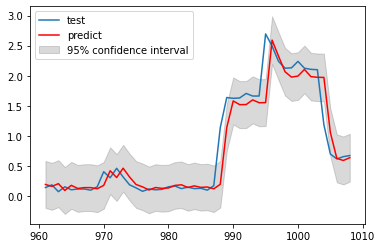

House 2

                              ARMA Model Results                              
Dep. Variable:                 house2   No. Observations:                  960
Model:                     ARMA(1, 0)   Log Likelihood                 311.614
Method:                       css-mle   S.D. of innovations              0.175
Date:                Sat, 22 May 2021   AIC                           -617.228
Time:                        13:12:27   BIC                           -602.627
Sample:                             0   HQIC                          -611.667
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5161      0.081      6.363      0.000       0.357       0.675
ar.L1.house2     0.9314      0.012     80.137      0.000       0.909       0.954
                                    Roots   

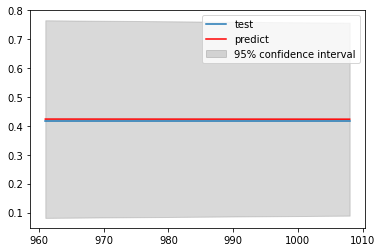

                              ARMA Model Results                              
Dep. Variable:                 house2   No. Observations:                  960
Model:                     ARMA(1, 2)   Log Likelihood                 313.254
Method:                       css-mle   S.D. of innovations              0.174
Date:                Sat, 22 May 2021   AIC                           -616.507
Time:                        13:12:29   BIC                           -592.173
Sample:                             0   HQIC                          -607.240
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5169      0.077      6.705      0.000       0.366       0.668
ar.L1.house2     0.9229      0.014     66.191      0.000       0.896       0.950
ma.L1.house2     0.0092      0.035      0.26

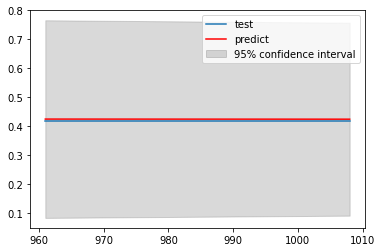

Change different data/time windows

House 1

                              ARMA Model Results                              
Dep. Variable:                 house1   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                  24.939
Method:                       css-mle   S.D. of innovations              0.186
Date:                Sat, 22 May 2021   AIC                            -41.879
Time:                        13:12:37   BIC                            -31.458
Sample:                             0   HQIC                           -37.661
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4678      0.254      1.838      0.066      -0.031       0.967
ar.L1.house1     0.9187      0.037     24.640      0.000       0.846       0.992
ma.L1.house1     0.2294      0.085      2.68

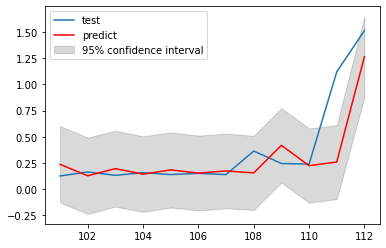

House 2

                              ARMA Model Results                              
Dep. Variable:                 house2   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                  -4.432
Method:                       css-mle   S.D. of innovations              0.252
Date:                Sat, 22 May 2021   AIC                             16.865
Time:                        13:12:38   BIC                             27.286
Sample:                             0   HQIC                            21.082
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4246      0.137      3.091      0.002       0.155       0.694
ar.L1.house2     0.8572      0.057     15.030      0.000       0.745       0.969
ma.L1.house2    -0.1806      0.090     -2.00

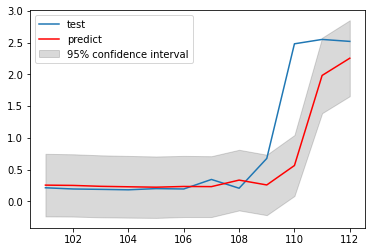

In [165]:
from statsmodels.tools.eval_measures import mse
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


# Define a function to model ARMA
def ARMA_model_new(train, test, p, d, q):
    # Define model
    model = ARIMA(train, order=(p, d, q))
    model_fit = model.fit()

    # summary of fit model
    print(model_fit.summary())
    print(model_fit.fittedvalues)
    print(model_fit.params)

    # Forecast
    # fc, se, conf = model_fit.forecast(testSize, alpha=0.05)  # 95% conf
    history = [x for x in train]
    fc = []
    conf = []
    for t in test.index.values:
        model = ARIMA(history, order=(p, d, q))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        confhat = output[2]
        fc.append(yhat)
        conf.append(confhat)
        obs = test[t]
        history.append(obs)
        # print('predicted=%f, expected=%f' % (yhat, obs))
    
    fc = np.stack(fc, axis=0)
    conf = np.stack(conf, axis=1)[0]
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    test = test.to_numpy().reshape(-1, 1)
    MSE = mse(test, fc)
    print('Test MSE: %.3f' % MSE)

    # Plot
    # plot forecasts against actual outcomes
    plt.plot(lower_series.index, test, label='test')
    plt.plot(lower_series.index, fc, color='red', label='predict')
    plt.fill_between(lower_series.index, lower_series, upper_series,
                     color='k', alpha=.15, label='95% confidence interval')
    plt.legend()
    plt.show()
    
# Define a function to model ARMA
def ARMA_model(train, test, p, d, q):
    # Define model
    model = ARIMA(train, order=(p, d, q))
    model_fit = model.fit()

    # summary of fit model
    print(model_fit.summary())
    print(model_fit.fittedvalues)
    print(model_fit.params)

    # Forecast
    fc, se, conf = model_fit.forecast(testSize, alpha=0.05)  # 95% conf
    MSE = mse(test, fc)
    print('Test MSE: %.3f' % MSE)

    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure()
    # plt.plot(train1, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series,
                     color='k', alpha=.15, label='95% confidence interval')
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

    
### Problem 2.1.1
display(Markdown(r"$Question\;2.1.1$"))

# Split into training and test sets
trainSize = 960
testSize = 48
train1, test1 = house1[0:trainSize], house1[trainSize:trainSize+testSize]
train2, test2 = house2[0:trainSize], house2[trainSize:trainSize+testSize]

## House 1
display(Markdown(r"House 1"))

ARMA_model_new(train1, test1, 1, 0, 1)

######################################################################################################################

## House 2
display(Markdown(r"House 2"))

ARMA_model_new(train2, test2, 1, 0, 1)


######################################################################################################################
######################################################################################################################


### Problem 2.1.2
display(Markdown(r"$Question\;2.1.2$"))

## Change AR degrees
display(Markdown(r"Change AR degrees"))

# House 1
display(Markdown(r"House 1"))

ARMA_model_new(train1, test1, 0, 0, 1)
ARMA_model_new(train1, test1, 2, 0, 1)

## House 2
display(Markdown(r"House 2"))

ARMA_model_new(train2, test2, 0, 0, 1)

######################################################################################################################

## Change MA degrees
display(Markdown(r"Change MA degrees"))

# House 1
display(Markdown(r"House 1"))

ARMA_model_new(train1, test1, 1, 0, 0)
ARMA_model_new(train1, test1, 1, 0, 2)

## House 2
display(Markdown(r"House 2"))

ARMA_model_new(train2, test2, 1, 0, 0)
ARMA_model_new(train2, test2, 1, 0, 2)

######################################################################################################################

## Change different data/time windows
display(Markdown(r"Change different data/time windows"))

# Split into training and test sets
trainSize = 100
testSize = 12
train1, test1 = house1[0:trainSize], house1[trainSize:trainSize+testSize]
train2, test2 = house2[0:trainSize], house2[trainSize:trainSize+testSize]

# House 1
display(Markdown(r"House 1"))

ARMA_model_new(train1, test1, 1, 0, 1)


## House 2
display(Markdown(r"House 2"))

ARMA_model_new(train2, test2, 1, 0, 1)


### Question 2.2 (9 pts) Time Series Estimation using DNN/LSTM

Now, we will use DNNs, specifically LSTM to estimate the power consumption of house 1 and house 2. Specifically, we prepare date for estimating the next 24 hour period based on past 24 hours. Note that 24 hours mean 48 data points due to smart meters reporting half-hourly energy usage.

1. Define and train Keras model that consists of LSTM and Dense layers with 48 point input and 48 point output to forecast demand over the next 24 hour period based on past 24 hours. What type of activation function would you use at the output layer? Why? Try different (appropriate) loss functions and optimisers. You can use "mse" and "adam" as default choices. Choose batch_size=128 and epoch=20 as parameters to begin with. You can change these to your liking and are encouraged to experiment.
2. Provide model summary and keep track of training history to provide a plot of loss function over epochs. Make predictions for different days and plot your predictions along with actual data. You can evaluate performance by calculating mean-squared error per day or over multiple days in the test set.
3. _[optional, no points]_ you can try using 1-D CNN layer(s) before LSTM ones as a non-linear filter. Do you observe any improvements?

**Useful documents and functions**
* [Keras model api documentation](https://www.tensorflow.org/api_docs/python/tf/keras), [visualisation](https://www.tensorflow.org/guide/keras/train_and_evaluate#visualizing_loss_and_metrics_during_training), [sequential model](https://www.tensorflow.org/guide/keras/sequential_model).
* _fit, summary, evaluate, predict_
* a few links to resources that may be useful:
>https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#attributes-and-underlying-data
>https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/ 
>
>https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/
>
>https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
>
>https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
>https://github.com/ni79ls/har-keras-cnn

In [171]:
# sliding window function for next 24 hourly estimate
# see, e.g. https://towardsdatascience.com/using-lstms-to-forecast-time-series-4ab688386b1f
# or https://machinelearningmastery.com/reframe-time-series-forecasting-problem/
def house_data(inseries):
    window_size = 48+48
    series = inseries
    series_s = inseries.copy()
    for i in range(window_size):
        series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    series.dropna(axis=0, inplace=True)
    X = series.iloc[:,0:48]
    yday = series.iloc[:,48:48+48] # next day
    return X, yday


# get the estimate data for house1 and house2
X1, yday1 = house_data(house1[0:8736])
X2, yday2 = house_data(house2[0:8736])

X1.shape, yday1.shape

((8640, 48), (8640, 48))

In [172]:
# split into training and test sets for house 1
X1train, X1test, y1train, y1test = train_test_split(X1, yday1)
X1train = np.array(X1train).reshape(X1train.shape[0],X1train.shape[1],1)
X1test = np.array(X1test).reshape(X1test.shape[0],X1test.shape[1],1)

X1train.shape, X1test.shape, y1train.shape, y1test.shape

X2train, X2test, y2train, y2test = train_test_split(X2, yday2)
X2train = np.array(X2train).reshape(X2train.shape[0],X2train.shape[1],1)
X2test = np.array(X2test).reshape(X2test.shape[0],X2test.shape[1],1)

X2train.shape, X2test.shape, y2train.shape, y2test.shape

((6480, 48, 1), (2160, 48, 1), (6480, 48), (2160, 48))

In [173]:
from tensorflow.keras.layers import LSTM
import time
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

$Question\;2.2.1$

House 1

House 2

$Question\;2.2.2$

House 1

Model: "sequential_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_421 (Dense)            (None, 8)                 168       
_________________________________________________________________
dense_422 (Dense)            (None, 48)                432       
Total params: 2,360
Trainable params: 2,360
Non-trainable params: 0
_________________________________________________________________
None
108/108 - 0s - loss: 0.0679
0.06787347793579102


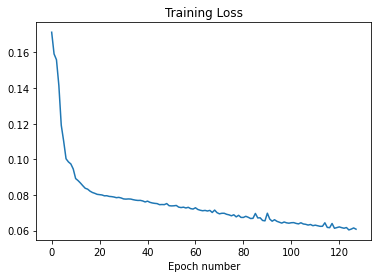

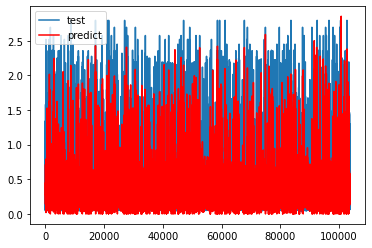

Test MSE: 0.068


House 2

Model: "sequential_139"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_423 (Dense)            (None, 8)                 168       
_________________________________________________________________
dense_424 (Dense)            (None, 48)                432       
Total params: 2,360
Trainable params: 2,360
Non-trainable params: 0
_________________________________________________________________
None
108/108 - 0s - loss: 0.0789
0.07889591157436371


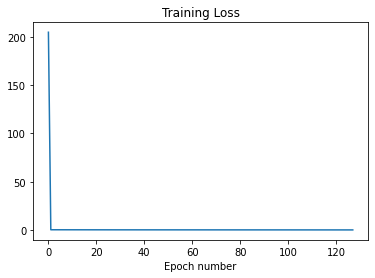

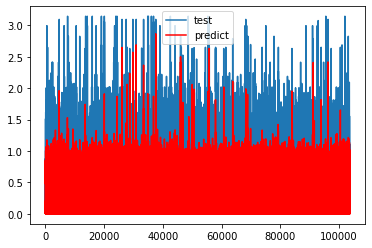

Test MSE: 0.079


In [175]:
### Problem 2.2.1
display(Markdown(r"$Question\;2.2.1$"))

# train the model
def build_model(Xtrain, ytrain):
    # prepare data
    # define parameters
    verbose, epochs, batch_size = 0, 128, 20
    n_timesteps, n_features, n_outputs = Xtrain.shape[1], Xtrain.shape[2], ytrain.shape[1]
    # define model
    model = Sequential()
    model.add(LSTM(20, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(n_outputs, activation='relu'))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    model_fit = model.fit(Xtrain, ytrain, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model, model_fit

## House 1
display(Markdown(r"House 1"))

# fit model
model1, model1_fit = build_model(X1train, y1train)
y1pred = model1.predict(X1test)

######################################################################################################################

## House 2
display(Markdown(r"House 2"))

# fit model
model2, model2_fit = build_model(X2train, y2train)
y2pred = model2.predict(X2test)


######################################################################################################################
######################################################################################################################
### Problem 2.2.2
display(Markdown(r"$Question\;2.2.2$"))

## House 1
display(Markdown(r"House 1"))

print(model1.summary())

score = model1.evaluate(X1test, y1test, batch_size=20, verbose=2)
print(score)

plt.figure()
plt.plot(model1_fit.history['loss'])
plt.xlabel('Epoch number')
plt.title('Training Loss')
plt.show()

# plot forecasts against actual outcomes
plt.plot(y1test.to_numpy().reshape(-1, 1), label='test')
plt.plot(y1pred.reshape(-1, 1), color='red', label='predict')
plt.legend()
plt.show()

MSE = mean_squared_error(y1test.to_numpy().reshape(-1, 1), y1pred.reshape(-1, 1))
print('Test MSE: %.3f' % MSE)

######################################################################################################################

## House 2
display(Markdown(r"House 2"))

print(model2.summary())

score = model2.evaluate(X2test, y2test, batch_size=20, verbose=2)
print(score)

plt.figure()
plt.plot(model2_fit.history['loss'])
plt.xlabel('Epoch number')
plt.title('Training Loss')
plt.show()

# plot forecasts against actual outcomes
plt.plot(y2test.to_numpy().reshape(-1, 1), label='test')
plt.plot(y2pred.reshape(-1, 1), color='red', label='predict')
plt.legend()
plt.show()

MSE = mean_squared_error(y2test.to_numpy().reshape(-1, 1), y2pred.reshape(-1, 1))
print('Test MSE: %.3f' % MSE)

1. Use 'ReLU' as the activation function at the output layer since we may get any positive value at the output. It is different from previous questions which use active function to classify. Use "mse" and "adam" as default choices. Choose batch_size=128 and epoch=20 as parameters to begin with. 
2. The model summary and training history over epochs are shown above. MSE for house 1 is about 0.068; MSE for house 2 is about 0.079.

# Reinforcement Learning Overview

**Reinforcement Learning (RL)** has been making headlines the last few years and there are good reasons for it! Extensions of the methods you will see in this workshop have been used to make computers learn [how to play Atari games by themselves](https://openai.com/blog/openai-baselines-dqn/) [(see also this)](https://deepmind.com/research/publications/playing-atari-deep-reinforcement-learning/). The recent advances in [solving most challenging board games](https://deepmind.com/research/alphago/) have been very impressive. Until even ten years ago, many people believed that computers would never learn how to play the game "Go" due to its combinatorial complexity. Today, AlphaGo variants are the first computer program to defeat a professional human Go player, the first program to defeat a Go world champion, and arguably the strongest Go player in history. It is a testament to the power of RL that [AlphaGo Zero](https://deepmind.com/blog/alphago-zero-learning-scratch/) learns to play simply by playing games against itself, starting from completely random play. 

The theoretical foundations of RL have been known for a long while as presented in lectures. Today's successes basically come from well-engineered or designed software that runs on powerful computing systems. Multiple heuristic algorithms and designs verified through extensive experimentation seem to be the key methodology. Despite introducing state-of-the-art concepts, tools, and implementations, this workshop provides only a initial starting point to the world of modern RL.

> Learning more on RL requires good coding skills and a powerful computer (often with a good CUDA-supporting graphic card) or a cloud computing account with one of the major providers. Computer and board games have been the natural playground of modern RL. However, [applications of RL to engineering disciplines](https://blog.insightdatascience.com/using-reinforcement-learning-to-design-a-better-rocket-engine-4dfd1770497a) remains an under-explored and very exciting domain!

## Additional packages to install

From this point on, we will use the [Openai gym](http://gym.openai.com) package for convenience. You can [install a minimum version](https://github.com/openai/gym#installation) simply by using

```conda install -c conda-forge gym``` 

from within the Anaconda environment. This minimal install is sufficient for our purposes. 

(You may or may not need to install [_Build Tools for Visual Studio 2019 (right click to download install instructions)_](./files/Windows_build_tools_install_2019.pdf) if you are using Windows 10.)

_Ask for help from your demonstrator in case you need it._


# Section 3: RL with Multi-armed Bandits

<img align="center" src="img/Las_Vegas_slot_machines.jpg" width="500" hspace="20"/>  

In a **k-armed (multi-armed) bandit** problem, a decision making agent repeatedly chooses one of $k$ different actions. Each action can be interpreted as pulling one of the k-levers. After each choice, the agent receives a reward obtained from a probability distribution that depends on the selected action. The objective is to maximise the expected total reward over a time horizon, for example, over 1000 action selections, or time steps. Multi-armed bandits have [a variety of important applications](https://medium.com/@CornellResearch/whats-behind-your-navigation-app-79d2754e6878) ranging from clinical trials and routing (including navigation) to recommender systems. 

As a special case of _reinforcement learning_, the [multi-armed bandit](https://en.wikipedia.org/wiki/Multi-armed_bandit) problem has actually only a single state. The agent still has to learn the environment represented by the underlying probability distributions and rewards. The problem provides a nice introduction to _reinforcement learning_ and an opportunity to explore the fundamental **exploration versus exploitation** trade-offs involved.

_Hint: Example implementations online (randomly selected, not guaranteed to be correct):_
* https://www.analyticsvidhya.com/blog/2018/09/reinforcement-multi-armed-bandit-scratch-python/
* https://peterroelants.github.io/posts/multi-armed-bandit-implementation/
* https://lilianweng.github.io/lil-log/2018/01/23/the-multi-armed-bandit-problem-and-its-solutions.html
* https://towardsdatascience.com/comparing-multi-armed-bandit-algorithms-on-marketing-use-cases-8de62a851831

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import matplotlib
from collections import deque
from tensorflow.keras.optimizers import Adam
import gym
from IPython.display import Markdown, display

### 10-armed bandit data set

Let's first (create or) _load_ a random 10-armed data set that approximately matches the description in Section 2.3 of [Sutton and Barto RL book.](http://incompleteideas.net/book/the-book-2nd.html) 

In [7]:
def gen_data(num_bandits=10, T=2000, filename='10armdata'):
    ## function generates a synthetic data set with given parameters 
    ## and saves the result to files folder under the given name
    
    # init data array
    tenarm_data = np.zeros((T,num_bandits))

    # random mean awards
    mean_rewards = np.random.normal(size=num_bandits)
    #print(mean_rewards)
    #print(np.random.normal(0,1,num_bandits))
    for t in range(T):
        tenarm_data[t,:]=np.random.normal(mean_rewards,1,num_bandits)
        
    np.save('./files/'+filename, tenarm_data)


# No need to set the random seed again if you did it in above cells.    
    
#gen_data()
#tenarm_data.shape
#tenarm_data[0:10,:]

# use generated data
tenarm_datal = np.load('./files/10armdata.npy')
tenarm_datal.shape

(2000, 10)

### Multi-armed Bandit Algorithms

We now implement a simple random strategy for selecting actions. The results are also random as expected. This can be considered as pure **exploration** since the algorithm keeps randomly choosing actions. However, note that we do not make proper use of the randomly collected observations yet.

-408.69326067926886


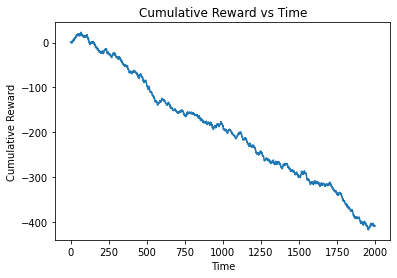

In [8]:
def bandit_random(data=tenarm_datal):
    # random selection bandit algorithm
    
    num_bandits = tenarm_datal.shape[1]
    T = tenarm_datal.shape[0]
    # init storage arrays
    selections = np.zeros(T) # sequence of lever selections
    step_rewards = np.zeros(T) # sequence of step selections
    cum_rewards = np.zeros(T) # sequence of cumulative rewards
    # main loop
    for t in range(T):
        sel = random.randrange(num_bandits)
        selections[t] = sel
        step_rewards[t] = data[t,sel]
        if t>0:
            cum_rewards[t] = step_rewards[t]+cum_rewards[t-1]
        else:
            cum_rewards[t] = step_rewards[t]
            
    total_reward = cum_rewards[-1] # the last one is total reward!
    
    return (selections, step_rewards, cum_rewards, total_reward)
    


(selections, step_rewards, cum_rewards, total_reward) = bandit_random()

print(total_reward)
plt.figure()
plt.title('Cumulative Reward vs Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Reward')
plt.plot(cum_rewards)
plt.show()

Let us consider next a more meaningful strategy, known as **$\varepsilon$-greedy algorithm**. The idea is to explore with a pre-determined fixed probability $\varepsilon<1$ and exploit, i.e. get the maximum reward given current knowledge, with probability $1-\varepsilon$. The observations are now used to estimate the values of actions by averaging. This well-known algorithm is discussed in Section 2.7 of [Sutton and Barto book](http://incompleteideas.net/book/the-book-2nd.html) and described below:

<img align="center" src="img/eps-bandit.png" width="800" hspace="20"/>  

We provide a rudimentary implementation below as a single run.

1789.850933086173


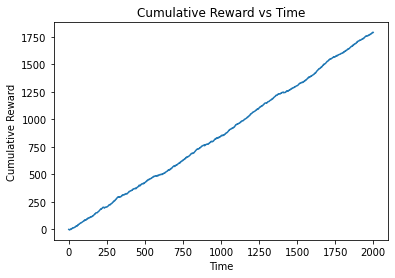

In [9]:
def bandit_epsgreedy(data=tenarm_datal, eps=0.1):
    # epsilon-greedy bandit algorithm
    
    # parameters
    num_bandits = data.shape[1]
    T = data.shape[0]
    
    # init storage arrays
    Q = np.zeros(num_bandits)
    N = np.zeros(num_bandits)
    selections = np.zeros(T) # sequence of lever selections
    step_rewards = np.zeros(T) # sequence of step selections
    cum_rewards = np.zeros(T) # sequence of cumulative rewards
    # main loop
    for t in range(T):
        
        # pull lever
        if np.random.rand() < eps:
            # make a random selection
            sel = random.randrange(num_bandits)
        else:
            # choose the best expected reward
            sel = np.argmax(Q)
            
        # update nbr of selections made
        N[sel] = N[sel] + 1 
        # update mean reward estimate
        Q[sel] = Q[sel] + (1/N[sel])*(data[t,sel]- Q[sel])
        
        # store values
        selections[t] = sel
        step_rewards[t] = data[t,sel]
        if t>0:
            cum_rewards[t] = step_rewards[t]+cum_rewards[t-1]
        else:
            cum_rewards[t] = step_rewards[t]
            
    total_reward = cum_rewards[-1] # the last one is total reward!
    
    return (selections, step_rewards, cum_rewards, total_reward)
    


(selections, step_rewards, cum_rewards, total_reward) = bandit_epsgreedy(eps=0.15)

print(total_reward)
plt.figure()
plt.title('Cumulative Reward vs Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Reward')
plt.plot(cum_rewards)
plt.show()

Next, we run the algorithm over multiple simulations, which we generate by permutating the input data. The obtained average results are naturally less "noisy". **It may take many simulations to get low-variance, averaged results.**

Average total reward =  1683.512091862271


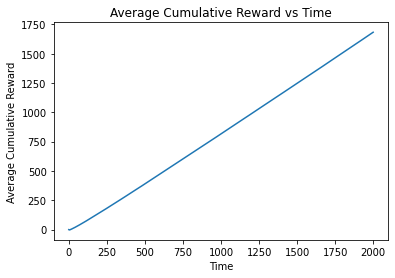

In [10]:
def bandit_epsgreedy_sims(datasim=tenarm_datal, epsilon=0.1, nbr_sims=10):
    # parameters
    num_bandits = datasim.shape[1]
    T = datasim.shape[0]
    
    # store values
    sim_cum_rewards = np.zeros((nbr_sims,T))
    sim_total_rewards = np.zeros(nbr_sims)
    
    for s in range(nbr_sims):
        (dummy,dummy, cum_rewards, total_reward) = bandit_epsgreedy(data=np.random.permutation(datasim),
                                                                    eps=epsilon)
        sim_cum_rewards[s,:] = cum_rewards
        sim_total_rewards[s] = total_reward
    
    return (sim_cum_rewards, sim_total_rewards)


(sim_cum_rewards, sim_total_rewards) = bandit_epsgreedy_sims(epsilon=0.15, nbr_sims=1000)
print('Average total reward = ', np.average(sim_total_rewards))

sim_avg_rewards = np.average(sim_cum_rewards, axis=0)
sim_avg_rewards.shape
plt.figure()
plt.title('Average Cumulative Reward vs Time')
plt.xlabel('Time')
plt.ylabel('Average Cumulative Reward')
plt.plot(sim_avg_rewards)
plt.show()

### Exploration vs Exploitation Trade-off

It is important to investigate the relationship between the outcome (average cumulative reward over time) and $\varepsilon$ parameter. For small $\varepsilon$, the algorithm is more greedy and chooses the best action (given knowledge level, here Q estimate) most of the time. This is called **exploitation** in [reinforcement learning (RL)](https://en.wikipedia.org/wiki/Reinforcement_learning). For large $\varepsilon$, the algorithm spends more time in **exploration** mode and obtains better Q estimates. This **exploration vs exploitation** trade-off is [fundamental to all RL approaches](https://www.coursera.org/lecture/practical-rl/exploration-vs-exploitation-3ExUr), not just multi-armed bandits. The same concepts are also relevant to [dual control](https://en.wikipedia.org/wiki/Dual_control_theory) as well as [adaptive control](https://en.wikipedia.org/wiki/Adaptive_control). 

### Question 1 (8 pts) A Multi-armed bandit for CDN Optimisation

In this question, the problem of real-world data retrieval from multiple redundant sources is investigated. This communication network problem is commonly known as the Content Distribution Network (CDN) problem [(see a relevant paper, right click to download)](./files/performance_of_CDN.pdf). An agent must retrieve data through a network with several redundant sources available. For each retrieval, the agent selects one source and waits until the data is retrieved. The objective of the agent is to minimize the sum of the delays for the successive retrievals. This problem is investigated in Section 4.2 of [this paper, (right click to download)](./files/bandit.pdf) and related [project](http://bandit.sourceforge.net/) as well as discussed in this [practical book](http://shop.oreilly.com/product/0636920027393.do).

We will use a subset of the [publicly available](./files/license.txt) universities web latency networking data set from the [bandit project](http://bandit.sourceforge.net/), which contains retrieval delay/latency measurements from over 700 universities' homepages in milliseconds. Let's decrease the number of bandits (columns) randomly to 20 to make it computationally less time consuming (but you can change this later if you wish). The rewards are the negatives of the delays.

In [11]:
univ_data = pd.read_csv('./files/univ-latencies.csv')
univ_data = -univ_data.sample(n=20, axis=1) #choose 20 columns randomly for computational simplicity
univ_data.head()

willamette-edu   isel-ipl-pt   aum-edu   utsa-edu   epfl-ch   ggu-edu  \
0             -685          -683      -111       -134      -420      -398   
1             -821          -729      -227       -129      -418      -374   
2             -492          -706      -102       -137      -419      -391   
3             -602          -682      -126       -130      -418      -462   
4             -800          -699      -102       -159      -422      -449   

    njit-edu   ufrn-br   uop-edu   salisbury-edu   nust-edu-pk   uci-edu  \
0       -378      -689      -401             -95         -1276      -315   
1       -281      -594      -163             -49          -345      -310   
2       -309     -3474       -87             -61          -181      -308   
3       -229      -517       -88            -463          -129      -308   
4       -258      -537       -86             -66           -85      -320   

    cuni-cz   umist-ac-uk   uvic-ca   oru-se   cortland-edu   mcgill-ca  \
0      -526          -491      -823    -1132           -649        -606   
1      -467          -494      -742     -710           -497        -612   
2      -492          -489      -771     -641           -386        -876   
3      -474          -491      -753     -661           -661        -839   
4      -606          -490      -870     -590           -360        -913   

    roosevelt-edu   erau-edu  
0             -69       -314  
1             -31       -271  
2             -28       -288  
3             -27       -262  
4             -26       -267

_Answer the following by implementing and simulating well-known multi-armed bandit algorithms._

1. (8 pts) Apply $\varepsilon$-greedy algorithm to the CDN problem. Sample randomly with replacement from the _univ-latencies_ dataset in order to simulate latencies. You should use negative of latencies as rewards here since high latency is not desirable. Try different $\varepsilon$ values to investigate exploration vs exploitation trade-off and the best total average reward.
2. (12 pts) Implement and apply _upper confidence bound_ (UCB) action selection algorithm to the same data set. Compare your results and briefly discuss your findings.

1. Do 1000 times simulations for each case and use the average result. The best epsilon is 0.003 and the minimum latency is about 205170.49. In all, the best epsilon is close to  0, which means we do not need too much exploration. This can be possible because these data are relatively regular to a certain extent. For example, when the network delay is large at the beginning, the performance has been large after that, and vice versa.<br/>
1) exploitation(large epsilon) consists of probing a limited (but promising) region of the search space with the hope of improving a promising solution S that we already have at hand. This operation amounts then to intensifying (refining) the search in the vicinity of S. By doing so, we would be doing, de facto, a local search.
2) exploration(small epsilon), on the other hand, consists of probing a much larger portion of the search space with the hope of finding other promising solutions that are yet to be refined. This operation amounts then to diversifying the search in order to avoid getting trapped in a local optimum. By doing so, we would be doing, de facto, a global search.

2. Do 100 times simulations for each case and use the average result. The best c is 1 and the minimum latency is about 195819. <br/>
Here Q is the exploitation similar with that in previous question; c is the degree of exploration similar with that in previous question. If c is too small we would be stuck in local mimimum; if c is too large we would spend too much to explore and get less rewards. UCB, whose exploration part is based on the potential optimality, genarally better than epsilon-greedy. 

$Question\;3.2.1$

epsilon= 0.001
Average total reward =  -214700.76


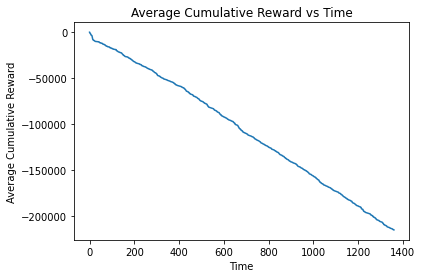

epsilon= 0.002
Average total reward =  -206723.7


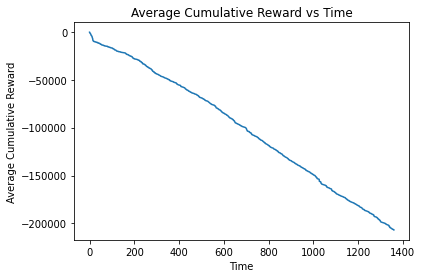

epsilon= 0.003
Average total reward =  -205170.49


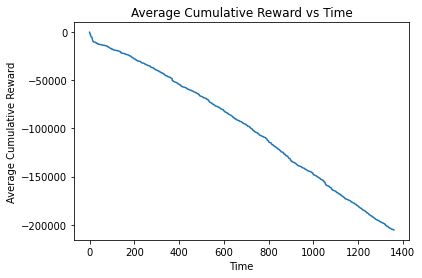

epsilon= 0.004
Average total reward =  -214755.28


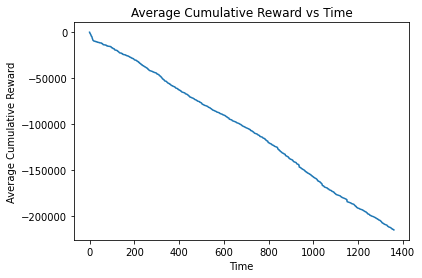

$Question\;3.2.2$

c^2= 1.000
Average total reward =  -195819.0


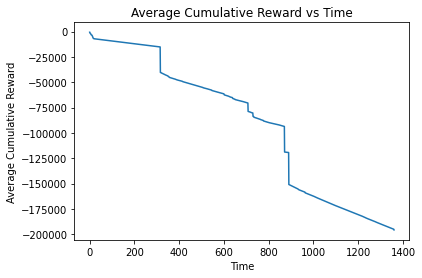

c^2= 4.000
Average total reward =  -200880.0


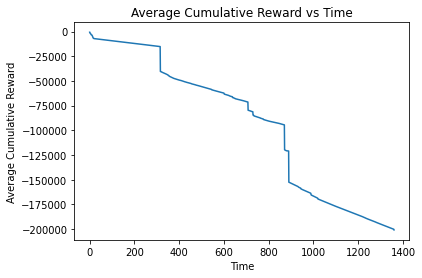

c^2= 7.000
Average total reward =  -200920.0


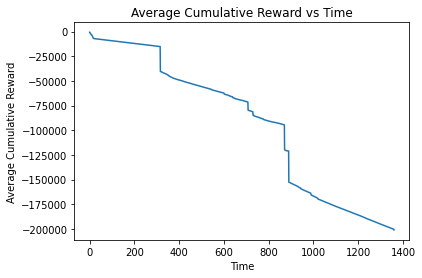

In [57]:
import math

### Problem 3.1.1
display(Markdown(r"$Question\;3.2.1$"))
# univ_data = univ_data.to_numpy()

## epsilon
epsilons = np.arange(0.001, 0.005, 0.001)

for i in range(len(epsilons)):
    print('epsilon= %.3f' %epsilons[i])

    (sim_cum_rewards, sim_total_rewards) = bandit_epsgreedy_sims(datasim=univ_data, epsilon=epsilons[i], nbr_sims=100)
    print('Average total reward = ', np.average(sim_total_rewards))

    sim_avg_rewards = np.average(sim_cum_rewards, axis=0)
    sim_avg_rewards.shape
    plt.figure()
    plt.title('Average Cumulative Reward vs Time')
    plt.xlabel('Time')
    plt.ylabel('Average Cumulative Reward')
    plt.plot(sim_avg_rewards)
    plt.show()

######################################################################################################################
######################################################################################################################

### Problem 3.1.2
display(Markdown(r"$Question\;3.1.2$"))

# Define UCB
def UCB(c2, data=univ_data):
    num_bandits = data.shape[1]
    T = data.shape[0]
    c = math.sqrt(c2)  # the degree of exploration

    # Implementing UCB
    selections = np.zeros(T)  # sequence of lever selections
    step_rewards = np.zeros(T)  # sequence of step selections
    cum_rewards = np.zeros(T)  # sequence of cumulative rewards
    bandits_selected = np.zeros(num_bandits)  # each bandit selected times
    bandits_rewards = np.zeros(num_bandits)  # each bandit reward
    total_reward = 0  # the total reward

    for t in range(0, T):
        sel = 0
        max_upper_bound = -1e400
        for i in range(0, num_bandits):
            if bandits_selected[i] > 0:
                Q = bandits_rewards[i] / bandits_selected[i]  # exploitation
                delta = c * math.sqrt(math.log(t + 1) / bandits_selected[i])  # exploration
                upper_bound = Q + delta
            else:
                upper_bound = 1e400
            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                sel = i
        selections[t] = sel
        bandits_selected[sel] = bandits_selected[sel] + 1  # update each bandit selected times
        step_rewards[t] = univ_data[t, sel]  # step reward at time t
        cum_rewards[t] = cum_rewards[t - 1] + step_rewards[t]  # update sequence of cumulative rewards
        bandits_rewards[sel] = bandits_rewards[sel] + step_rewards[t]  # update each bandit reward

    total_reward = cum_rewards[-1]  # the last one is total reward!
    return (selections, step_rewards, cum_rewards, total_reward)


def bandit_UCB_sims(datasim, c2, nbr_sims=10):
    # parameters
    num_bandits = datasim.shape[1]
    T = datasim.shape[0]
    
    # store values
    sim_cum_rewards = np.zeros((nbr_sims,T))
    sim_total_rewards = np.zeros(nbr_sims)
    
    for s in range(nbr_sims):
        (dummy,dummy, cum_rewards, total_reward) = UCB(c2=c2, data=univ_data)
        sim_cum_rewards[s,:] = cum_rewards
        sim_total_rewards[s] = total_reward
    
    return (sim_cum_rewards, sim_total_rewards)


## c^2
c2 = np.arange(1, 10, 3)

for i in range(len(c2)):
    print('c^2= %.3f' %c2[i])
    (sim_cum_rewards, sim_total_rewards) = bandit_UCB_sims(datasim=univ_data, c2=c2[i], nbr_sims=100)
    print('Average total reward = ', np.average(sim_total_rewards))

    sim_avg_rewards = np.average(sim_cum_rewards, axis=0)
    sim_avg_rewards.shape
    plt.figure()
    plt.title('Average Cumulative Reward vs Time')
    plt.xlabel('Time')
    plt.ylabel('Average Cumulative Reward')
    plt.plot(sim_avg_rewards)
    plt.show()



# Section 4. Deep Reinforcement Learning 

In this section, we are going to use  a simple (v1) [cart-pole environment](http://gym.openai.com/envs/CartPole-v1/) from [openai gym](https://gym.openai.com/). In this classic control problem, a pole or [inverted pendulum](https://en.wikipedia.org/wiki/Inverted_pendulum) is attached vertically to a cart, which moves along a frictionless track. The system is controlled by applying a horizontal force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every time step that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

Note that, there are detailed models of the cartpole environment, [see for example this](https://danielpiedrahita.wordpress.com/portfolio/cart-pole-control/), which can be used to develop a variety of model-based solutions. However, we will use this simple environment to illustrate a _model-free,_ purely data-oriented modern **reinforcement learning** approach as discussed in the lectures.

First, let's have a look at the environment by taking random actions. When you run the cell below, you should see a new window with the cartpole environment for a short duration.

In [1]:
import gym
import time

env = gym.make('CartPole-v0')
env.reset()
for _ in range(100):
    env.render()
    observation, reward, done, info = env.step(env.action_space.sample()) # take a random action
    if done:
        break
        
time.sleep(2) # wait for 2 seconds
env.close()

### Environment

The figure below left depicts the standard **SARSA** (_State-Action-Reward-State'-Action'_) paradigm. As discussed during lectures, the idea is for the _agent_ to learn the environment and achieve the objective concurrently by taking a mixture of random actions and actions that maximise the cumulative reward. 

The figure below right represents an [implementation within the openai gym environment.](http://gym.openai.com/docs/#observations) In this implementation, _observation_ corresponds to state. 

<img align="left" src="img/sarsa.png" width="500" hspace="20"/>  <img align="center" src="img/openai_env.png" width="300" hspace="20"/>  

The environment is described in detail in the classic publication cited below [(right click to download)](./files/Barto1983.pdf). Note that this predates deep learning so it has more historical value than practical value, other than the model itself.

AG Barto, RS Sutton and CW Anderson, "Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem", IEEE Transactions on Systems, Man, and Cybernetics, 1983.

The states and actions are described within the [source code of the environment.](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)

Actions are $\{0,\, 1\}$, corresponding to "Push cart to the left" and "Push cart to the right", respectively.

In [1]:
import gym

env = gym.make('CartPole-v0')
print(env.action_space)
env.action_space.n

Discrete(2)


2

In [2]:
print(env.observation_space)

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


The states are \[Cart Position, Cart Velocity, Pole Angle, Pole Velocity At Tip\]. The angle is zero when to pole is pointing up. 

In [5]:
env = gym.make('CartPole-v1')
observation = env.reset()
print(np.array([env.reset()]))

[[-0.01916924  0.01479881 -0.03868345 -0.01254862]]


In [6]:
env = gym.make('CartPole-v1')
for episode in range(10):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample() # take a random action
        observation, reward, done, info = env.step(action) # episode ends when done=True based on conditions
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[ 0.0455477  -0.03449719  0.00279079  0.04586783]
[ 0.04485776 -0.22965905  0.00370814  0.33942997]
[ 0.04026458 -0.42483357  0.01049674  0.63327993]
[ 0.03176791 -0.62010037  0.02316234  0.92924997]
[ 0.0193659  -0.8155272   0.04174734  1.22912071]
[ 0.00305536 -0.62096655  0.06632976  0.94980418]
[-0.00936397 -0.81691566  0.08532584  1.26256815]
[-0.02570229 -0.622982    0.1105772   0.99778133]
[-0.03816193 -0.8193947   0.13053283  1.3230445 ]
[-0.05454982 -0.62614087  0.15699372  1.07389764]
[-0.06707264 -0.43340246  0.17847167  0.83431231]
[-0.07574069 -0.63045499  0.19515792  1.17738874]
Episode finished after 12 timesteps
[-0.04724582  0.04699938 -0.02942314 -0.02875478]
[-0.04630583  0.24253065 -0.02999824 -0.33057389]
[-0.04145522  0.04784828 -0.03660971 -0.04749988]
[-0.04049825  0.24347554 -0.03755971 -0.351505  ]
[-0.03562874  0.0489073  -0.04458981 -0.07089842]
[-0.03465059 -0.14554797 -0.04600778  0.20738949]
[-0.03756155 -0.33998287 -0.04185999  0.4852117 ]
[-0.04436121 -

[-0.01242351 -0.80594328 -0.02613181  1.04051302]
[-0.02854237 -1.0007085  -0.00532155  1.32487923]
[-0.04855654 -0.80551975  0.02117603  1.03053572]
[-0.06466694 -0.61068586  0.04178675  0.74457569]
[-0.07688065 -0.41616474  0.05667826  0.46533045]
[-0.08520395 -0.22188755  0.06598487  0.1910371 ]
[-0.0896417  -0.41788837  0.06980561  0.50378401]
[-0.09799947 -0.61392114  0.07988129  0.81762321]
[-0.11027789 -0.81004042  0.09623376  1.13432418]
[-0.1264787  -1.00628081  0.11892024  1.45557187]
[-0.14660431 -0.81280235  0.14803168  1.20228409]
[-0.16286036 -1.00949533  0.17207736  1.53745935]
[-0.18305027 -1.20621978  0.20282655  1.87852938]
Episode finished after 27 timesteps
[ 0.0012583   0.03893195 -0.017615   -0.00280047]
[ 0.00203694 -0.15593301 -0.01767101  0.28427307]
[-0.00108172 -0.35079853 -0.01198555  0.5713307 ]
[-8.09768814e-03 -5.45750371e-01 -5.58938412e-04  8.60213795e-01]
[-0.0190127  -0.74086471  0.01664534  1.15272092]
[-0.03382999 -0.93619979  0.03969976  1.45057647

### DQN Agent

We now create a DQN agent class, which implements the behaviour of the agent based on the [famous paper (right click to download)](./files/dqn.pdf). This implementation is based on Algorithm 1 (Deep Q-learning with Experience Replay) on page 5.  

* _Mnih, Volodymyr, Koray Kavukcuoglu, David Silver, Alex Graves, Ioannis Antonoglou, Daan Wierstra, and Martin Riedmiller. "Playing atari with deep reinforcement learning." arXiv preprint arXiv:1312.5602 (2013)._


In [6]:
class CartPoleDQN:
    def __init__(self, environment):
        
        # from cartpole environment
        self.env = environment
        self.nbr_states = self.env.observation_space.shape[0]
        self.nbr_actions = self.env.action_space.n
        
        # to store (state,action,reward)
        self.memory = deque(maxlen=1000000)
        self.scores=[]
        
        # parameters
        self.gamma = 0.95    # discount rate
        self.epsilon = 1    # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995 
        self.batch_size = 16
        
        # build the DNN model
        self.build_model()
        
        
    def build_model(self):
        """ Define Keras DNN model """
        
        
        self.rlmodel = Sequential()
        self.rlmodel.add(tf.keras.Input(shape=(self.nbr_states,)))
        self.rlmodel.add(Dense(16, activation='relu'))
        self.rlmodel.add(Dense(4, activation='relu'))
        self.rlmodel.add(Dense(self.nbr_actions, activation='linear'))


        self.rlmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.MeanSquaredError())
    
        
    
    def save_model(self, filename):
        
        self.rlmodel.save(filename+".h5")
        
        
    def load_model(self, filename):
        
        self.rlmodel = tf.keras.models.load_model(filename)
        
    def remember(self, state, action, reward, next_state, done):
        # store the SARSA from observation
        self.memory.append((state, action, reward, next_state, done))
        
    
    def act(self, state):
        
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.rlmodel.predict(state)[0]
            return np.argmax(q_values)
        
    
    def update_model(self):
        
        if len(self.memory) < self.batch_size:
            return
        
        # sample the mini-batch
        mini_batch=random.sample(self.memory, self.batch_size)
        
        # experience replay
        for state, action, reward, state_next, done in mini_batch:
            if done:
                q_update = reward
            else:
                q_update = reward + self.gamma*np.amax(self.rlmodel.predict(state_next)[0])
            q = self.rlmodel.predict(state)
            q[0][action] = q_update
            self.rlmodel.fit(state, q, batch_size=self.batch_size, verbose=0)

        
        # update exploration/exploitation balance
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        else:
            self.epsilon=self.epsilon_min

### Experiments and Training - Agent in Environment

The interaction of the agent with the environment is simulated below. Each **episode** ends when control fails, [defined as](https://gym.openai.com/envs/CartPole-v1/) the pole being more than 15 degrees from vertical, or the cart moving more than 2.4 units from the centre. 

A **reward** of $+1$ is given for every time step that the pole remains uprigh, so the **score** per episode is the number of steps where the control is successful.

In [9]:
env=gym.make('CartPole-v1')
dqn_agent = CartPoleDQN(environment=env)
for episode in range(10):
    # init episode
    state = env.reset()
    state = np.reshape(state, [1, dqn_agent.nbr_states]) # reshape for keras
    score = 0
    done = False
    # experience loop in episode
    while not done:
        #env.render()
        # action and state evolves
        action = dqn_agent.act(state)
        state_next, reward, done, info = env.step(action)        
        state_next = np.reshape(state_next, [1, dqn_agent.nbr_states]) # reshape for keras
        
        # have we failed, then no reward to add in this last step
        if done:
            reward = 0  # no reward for last time step
        score = score + reward
        
        # store experience in memory
        dqn_agent.remember(state, action, reward, state_next, done)
        state = state_next
        
        # train model
        dqn_agent.update_model()
        
        # if failed, end episode
        if done:
            dqn_agent.scores.append(score)
            print("Episode:", episode, "  Score:", score, "  memory length:",
                      len(dqn_agent.memory), "  epsilon:", dqn_agent.epsilon)
            break

env.close()
print("training completed!")

Episode: 0   Score: 13.0   memory length: 14   epsilon: 1
Episode: 1   Score: 14.0   memory length: 29   epsilon: 0.9322301194154049
Episode: 2   Score: 21.0   memory length: 51   epsilon: 0.8348931673187264
Episode: 3   Score: 51.0   memory length: 103   epsilon: 0.6433260027715241
Episode: 4   Score: 25.0   memory length: 129   epsilon: 0.5647174463480732
Episode: 5   Score: 12.0   memory length: 142   epsilon: 0.5290920728090721
Episode: 6   Score: 14.0   memory length: 157   epsilon: 0.4907693883854626
Episode: 7   Score: 15.0   memory length: 173   epsilon: 0.4529463432347434
Episode: 8   Score: 13.0   memory length: 187   epsilon: 0.4222502236424958
Episode: 9   Score: 12.0   memory length: 200   epsilon: 0.39561243860243744
training completed!


### Performance Evaluation

The original **criterion for success** is [defined as](https://gym.openai.com/envs/CartPole-v1/) getting an average reward of greater or equal than 195.0 over 100 consecutive trials. We relax this in order to (literally) save time. Let's consider a more modest version with an _average reward >=100 over 10 consecutive trials._

In [12]:
np.average(dqn_agent.scores)

19.0

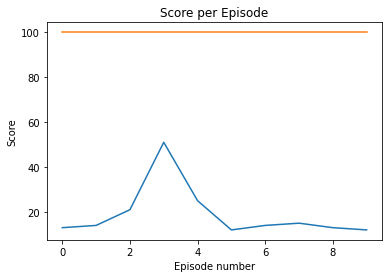

In [13]:
plt.figure()
plt.title('Score per Episode')
plt.xlabel('Episode number')
plt.ylabel('Score')
plt.plot(dqn_agent.scores)
plt.plot(np.ones((len(dqn_agent.scores),1))*100)
plt.show()

### Resulting DQN Model

We now look a bit closer to the DNN underlying the DQN model we have trained.

In [14]:
dqn_agent.rlmodel.summary()
print(dqn_agent.rlmodel.get_weights())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________
[array([[-1.3592345 , -0.05175469, -1.6257697 ,  0.41662106, -2.3260174 ,
        -2.7191377 , -3.0369406 ,  0.11047645, -2.631474  ,  0.6472641 ,
        -2.0369167 ,  0.21960087, -0.53282225,  0.37941226, -2.1748    ,
        -2.9784138 ],
       [-0.9333987 ,  0.42829436,  0.49464703, -0.0648926 ,  0.3863671 ,
         0.57391304,  0.35503075, -0.18764052,  0.7173423 ,  0.10139492,


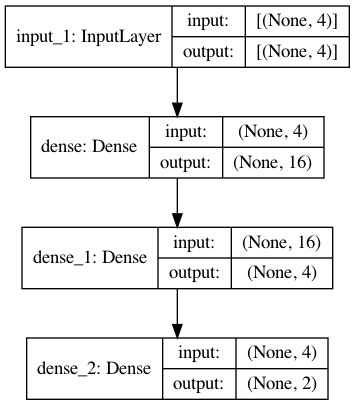

In [15]:
# Plot model graph
# you need to install pydot and graphviz via anaconda for this to work! restart notebook after installing these...
tf.keras.utils.plot_model(dqn_agent.rlmodel, "model.png" ,show_shapes=True)

### Visual test

We save our trained model to a file for reuse, which makes a lot of sense given the time spent on training. Then, we illustrate the performance of the model visually. Note that because we have cut the training short to save time, the result is rather sub-optimal.

In [16]:
# we save the trained model 
dqn_agent.save_model('dqn_train2')

In [17]:
# A few episodes to watch the behaviour

env = gym.make('CartPole-v1')
dqn_agent_test = CartPoleDQN(environment=env)
dqn_agent_test.load_model('dqn_train2.h5')
dqn_agent_test.epsilon = 0 # no random movements

for episode in range(5):
    state = env.reset()
    state = np.reshape(state, [1, dqn_agent_test.nbr_states]) # reshape for keras
    for t in range(150): # increase to 200 to see termination
        env.render()
        action = dqn_agent_test.act(state)
        state_next, reward, done, info = env.step(action)  
        state = np.reshape(state_next, [1, dqn_agent_test.nbr_states]) # reshape for keras
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

Episode finished after 10 timesteps
Episode finished after 9 timesteps
Episode finished after 9 timesteps
Episode finished after 9 timesteps
Episode finished after 9 timesteps


### Question 2 (10 pts)

This question aims to motivate you to fully understand and improve upon the example possibly **suboptimal** DQN implementation above. <br/>
_Hint: a good model is quite similar to what is provided so minor tweaking should work!_

1. How does this DQN differ from classical Q-learning (see e.g. Section 6.5 of Sutton and Barto RL book)? Clearly identify and discuss similarities as well as differences. In addition, briefly describe the relationship to value iteration and dynamic programming (via Bellman's equation).
2. Improve the performance of the DQN by changing the underlying DNN architecture, training method, and _epsilon_ parameter and its decay which controls the exploration vs exploitation trade-off. Interpret and discuss your findings, e.g. what works and does not work and why? 
3. _[Optional, no marks]_ Do you see a high-level similarity between epsilon parameter and diminishing step size in gradient optimisation algorithms? 
4. _[Optional, no marks]_ Try different DNN architectures as well as approaches, e.g. A3C or [beyond](https://towardsdatascience.com/advanced-reinforcement-learning-6d769f529eb3).

_Hint: example implementations from the Web (which may be incorrect):_

* https://towardsdatascience.com/cartpole-introduction-to-reinforcement-learning-ed0eb5b58288
* https://gym.openai.com/envs/CartPole-v0/
* https://github.com/rlcode/reinforcement-learning


1. They are both model-free algorithm, since no complete information of the environment is required. Both of them use off-policy method, which evaulates a policy different from that used to generate the data.<br/>
1) classical Q-learning: The idea here is we don’t need to consider the entire future actions, but only the one at the next time-step. There is one problem with current Q-Learning. That is the state space is huge. Each small change to the angle of the pole or the velocity of the cart represents a new state. We would need to have a very big memory to store all possible states. <br/>
2) DQN: To solve this problem, we need something to approximate a function that accepts a state-action pair (s, a) and returns the expected reward for that pair. That's when deep learning emerged. It is known for approximating functions only from training data. Hence, we can punish the network for the mistake it makes, and let it learn that mistake through back-propagation.
2. Changing DNN architecture and gamma does not improves DQN too much; changing epsilon and epsilon decay improves DQN much. This is because the output-layer uses linear activation and yields the Q-value for every action. And Adam with the standard learning-rate is a great optimizer as it’s appropriate to a lot of problems and hyper-parameters require only a little to no tuning. The epsilon value is a hyperparameter in DQN that acts as a tradeoff between exploring the environment and exploiting learnt knowledge. It allows us to control how much time would be spent by the agent in performing random actions in order to learn more about the environment in which it operates. 

In [5]:
from IPython.display import Markdown, display
import pandas as pd
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import matplotlib
from collections import deque
from tensorflow.keras.optimizers import Adam
import gym
from IPython.display import Markdown, display
import datetime
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

### Problem 4.2.2
display(Markdown(r"$Question\;4.2.2$"))

## Change DNN architecture
display(Markdown(r"Change DNN architecture"))

class CartPoleDQN:
    def __init__(self, environment):
        
        # from cartpole environment
        self.env = environment
        self.nbr_states = self.env.observation_space.shape[0]
        self.nbr_actions = self.env.action_space.n
        
        # to store (state,action,reward)
        self.memory = deque(maxlen=1000000)
        self.scores=[]
        
        # parameters
        self.gamma = 0.95    # discount rate
        self.epsilon = 1    # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995 
        self.batch_size = 16
        
        # build the DNN model
        self.build_model()
        
        
    def build_model(self):
        """ Define Keras DNN model """
        
        
        self.rlmodel = Sequential()
        self.rlmodel.add(tf.keras.Input(shape=(self.nbr_states,)))
        self.rlmodel.add(Dense(48, activation='relu'))
        self.rlmodel.add(Dense(96, activation='relu'))
        self.rlmodel.add(Dense(24, activation='relu'))
        self.rlmodel.add(Dense(self.nbr_actions, activation='linear'))


        self.rlmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.MeanSquaredError())
    
        
    
    def save_model(self, filename):
        
        self.rlmodel.save(filename+".h5")
        
        
    def load_model(self, filename):
        
        self.rlmodel = tf.keras.models.load_model(filename)
        
    def remember(self, state, action, reward, next_state, done):
        # store the SARSA from observation
        self.memory.append((state, action, reward, next_state, done))
        
    
    def act(self, state):
        
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.rlmodel.predict(state)[0]
            return np.argmax(q_values)
        
    
    def update_model(self):
        
        if len(self.memory) < self.batch_size:
            return
        
        # sample the mini-batch
        mini_batch=random.sample(self.memory, self.batch_size)
        
        # experience replay
        for state, action, reward, state_next, done in mini_batch:
            if done:
                q_update = reward
            else:
                q_update = reward + self.gamma*np.amax(self.rlmodel.predict(state_next)[0])
            q = self.rlmodel.predict(state)
            q[0][action] = q_update
            self.rlmodel.fit(state, q, batch_size=self.batch_size, verbose=0)

        
        # update exploration/exploitation balance
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        else:
            self.epsilon=self.epsilon_min
            
env=gym.make('CartPole-v1')
dqn_agent = CartPoleDQN(environment=env)
for episode in range(10):
    # init episode
    state = env.reset()
    state = np.reshape(state, [1, dqn_agent.nbr_states]) # reshape for keras
    score = 0
    done = False
    # experience loop in episode
    while not done:
        #env.render()
        # action and state evolves
        action = dqn_agent.act(state)
        state_next, reward, done, info = env.step(action)        
        state_next = np.reshape(state_next, [1, dqn_agent.nbr_states]) # reshape for keras
        
        # have we failed, then no reward to add in this last step
        if done:
            reward = 0  # no reward for last time step
        score = score + reward
        
        # store experience in memory
        dqn_agent.remember(state, action, reward, state_next, done)
        state = state_next
        
        # train model
        dqn_agent.update_model()
        
        # if failed, end episode
        if done:
            dqn_agent.scores.append(score)
            print("Episode:", episode, "  Score:", score, "  memory length:",
                      len(dqn_agent.memory), "  epsilon:", dqn_agent.epsilon)
            break

env.close()
print("training completed!")

$Question\;4.2.2$

Change DNN architecture

Episode: 0   Score: 26.0   memory length: 27   epsilon: 0.9416228069143757
Episode: 1   Score: 11.0   memory length: 39   epsilon: 0.8866535105013078
Episode: 2   Score: 20.0   memory length: 60   epsilon: 0.798065677681905
Episode: 3   Score: 36.0   memory length: 97   epsilon: 0.6629680834613705
Episode: 4   Score: 21.0   memory length: 119   epsilon: 0.5937455908197752
Episode: 5   Score: 8.0   memory length: 128   epsilon: 0.567555222460375
Episode: 6   Score: 12.0   memory length: 141   epsilon: 0.531750826943791
Episode: 7   Score: 10.0   memory length: 152   epsilon: 0.5032248303978422
Episode: 8   Score: 12.0   memory length: 165   epsilon: 0.47147873742168567
Episode: 9   Score: 10.0   memory length: 176   epsilon: 0.446186062443672
training completed!


In [11]:
## Change gamma
display(Markdown(r"Change gamma"))

class CartPoleDQN:
    def __init__(self, environment):
        
        # from cartpole environment
        self.env = environment
        self.nbr_states = self.env.observation_space.shape[0]
        self.nbr_actions = self.env.action_space.n
        
        # to store (state,action,reward)
        self.memory = deque(maxlen=1000000)
        self.scores=[]
        
        # parameters
        self.gamma = 0.9    # discount rate
        self.epsilon = 1    # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995 
        self.batch_size = 16
        
        # build the DNN model
        self.build_model()
        
        
    def build_model(self):
        """ Define Keras DNN model """
        
        
        self.rlmodel = Sequential()
        self.rlmodel.add(tf.keras.Input(shape=(self.nbr_states,)))
        self.rlmodel.add(Dense(16, activation='relu'))
        self.rlmodel.add(Dense(4, activation='relu'))
        self.rlmodel.add(Dense(self.nbr_actions, activation='linear'))


        self.rlmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.MeanSquaredError())
    
        
    
    def save_model(self, filename):
        
        self.rlmodel.save(filename+".h5")
        
        
    def load_model(self, filename):
        
        self.rlmodel = tf.keras.models.load_model(filename)
        
    def remember(self, state, action, reward, next_state, done):
        # store the SARSA from observation
        self.memory.append((state, action, reward, next_state, done))
        
    
    def act(self, state):
        
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.rlmodel.predict(state)[0]
            return np.argmax(q_values)
        
    
    def update_model(self):
        
        if len(self.memory) < self.batch_size:
            return
        
        # sample the mini-batch
        mini_batch=random.sample(self.memory, self.batch_size)
        
        # experience replay
        for state, action, reward, state_next, done in mini_batch:
            if done:
                q_update = reward
            else:
                q_update = reward + self.gamma*np.amax(self.rlmodel.predict(state_next)[0])
            q = self.rlmodel.predict(state)
            q[0][action] = q_update
            self.rlmodel.fit(state, q, batch_size=self.batch_size, verbose=0)

        
        # update exploration/exploitation balance
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        else:
            self.epsilon=self.epsilon_min
            
env=gym.make('CartPole-v1')
dqn_agent = CartPoleDQN(environment=env)
for episode in range(10):
    # init episode
    state = env.reset()
    state = np.reshape(state, [1, dqn_agent.nbr_states]) # reshape for keras
    score = 0
    done = False
    # experience loop in episode
    while not done:
        #env.render()
        # action and state evolves
        action = dqn_agent.act(state)
        state_next, reward, done, info = env.step(action)        
        state_next = np.reshape(state_next, [1, dqn_agent.nbr_states]) # reshape for keras
        
        # have we failed, then no reward to add in this last step
        if done:
            reward = 0  # no reward for last time step
        score = score + reward
        
        # store experience in memory
        dqn_agent.remember(state, action, reward, state_next, done)
        state = state_next
        
        # train model
        dqn_agent.update_model()
        
        # if failed, end episode
        if done:
            dqn_agent.scores.append(score)
            print("Episode:", episode, "  Score:", score, "  memory length:",
                      len(dqn_agent.memory), "  epsilon:", dqn_agent.epsilon)
            break

env.close()
print("training completed!")

Change gamma

Episode: 0   Score: 26.0   memory length: 27   epsilon: 0.9416228069143757
Episode: 1   Score: 35.0   memory length: 63   epsilon: 0.7861544476842928
Episode: 2   Score: 31.0   memory length: 95   epsilon: 0.6696478204705644
Episode: 3   Score: 21.0   memory length: 117   epsilon: 0.5997278763867329
Episode: 4   Score: 10.0   memory length: 128   epsilon: 0.567555222460375
Episode: 5   Score: 13.0   memory length: 142   epsilon: 0.5290920728090721
Episode: 6   Score: 11.0   memory length: 154   epsilon: 0.4982051627146237
Episode: 7   Score: 8.0   memory length: 163   epsilon: 0.47622912292284103
Episode: 8   Score: 10.0   memory length: 174   epsilon: 0.4506816115185697
Episode: 9   Score: 11.0   memory length: 186   epsilon: 0.42437208406280985
training completed!


In [9]:
## Change epsilon
display(Markdown(r"Change epsilon"))

class CartPoleDQN:
    def __init__(self, environment):
        
        # from cartpole environment
        self.env = environment
        self.nbr_states = self.env.observation_space.shape[0]
        self.nbr_actions = self.env.action_space.n
        
        # to store (state,action,reward)
        self.memory = deque(maxlen=1000000)
        self.scores=[]
        
        # parameters
        self.gamma = 0.95    # discount rate
        self.epsilon = 0.5    # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995 
        self.batch_size = 16
        
        # build the DNN model
        self.build_model()
        
        
    def build_model(self):
        """ Define Keras DNN model """
        
        
        self.rlmodel = Sequential()
        self.rlmodel.add(tf.keras.Input(shape=(self.nbr_states,)))
        self.rlmodel.add(Dense(16, activation='relu'))
        self.rlmodel.add(Dense(4, activation='relu'))
        self.rlmodel.add(Dense(self.nbr_actions, activation='linear'))


        self.rlmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.MeanSquaredError())
    
        
    
    def save_model(self, filename):
        
        self.rlmodel.save(filename+".h5")
        
        
    def load_model(self, filename):
        
        self.rlmodel = tf.keras.models.load_model(filename)
        
    def remember(self, state, action, reward, next_state, done):
        # store the SARSA from observation
        self.memory.append((state, action, reward, next_state, done))
        
    
    def act(self, state):
        
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.rlmodel.predict(state)[0]
            return np.argmax(q_values)
        
    
    def update_model(self):
        
        if len(self.memory) < self.batch_size:
            return
        
        # sample the mini-batch
        mini_batch=random.sample(self.memory, self.batch_size)
        
        # experience replay
        for state, action, reward, state_next, done in mini_batch:
            if done:
                q_update = reward
            else:
                q_update = reward + self.gamma*np.amax(self.rlmodel.predict(state_next)[0])
            q = self.rlmodel.predict(state)
            q[0][action] = q_update
            self.rlmodel.fit(state, q, batch_size=self.batch_size, verbose=0)

        
        # update exploration/exploitation balance
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        else:
            self.epsilon=self.epsilon_min
            
env=gym.make('CartPole-v1')
dqn_agent = CartPoleDQN(environment=env)
for episode in range(10):
    # init episode
    state = env.reset()
    state = np.reshape(state, [1, dqn_agent.nbr_states]) # reshape for keras
    score = 0
    done = False
    # experience loop in episode
    while not done:
        #env.render()
        # action and state evolves
        action = dqn_agent.act(state)
        state_next, reward, done, info = env.step(action)        
        state_next = np.reshape(state_next, [1, dqn_agent.nbr_states]) # reshape for keras
        
        # have we failed, then no reward to add in this last step
        if done:
            reward = 0  # no reward for last time step
        score = score + reward
        
        # store experience in memory
        dqn_agent.remember(state, action, reward, state_next, done)
        state = state_next
        
        # train model
        dqn_agent.update_model()
        
        # if failed, end episode
        if done:
            dqn_agent.scores.append(score)
            print("Episode:", episode, "  Score:", score, "  memory length:",
                      len(dqn_agent.memory), "  epsilon:", dqn_agent.epsilon)
            break

env.close()
print("training completed!")

Change epsilon

Episode: 0   Score: 17.0   memory length: 18   epsilon: 0.4925374375
Episode: 1   Score: 14.0   memory length: 33   epsilon: 0.4568624430062966
Episode: 2   Score: 24.0   memory length: 58   epsilon: 0.40305329546319785
Episode: 3   Score: 9.0   memory length: 68   epsilon: 0.38334807243266145
Episode: 4   Score: 13.0   memory length: 82   epsilon: 0.3573686193415653
Episode: 5   Score: 9.0   memory length: 92   epsilon: 0.3398969141663289
Episode: 6   Score: 9.0   memory length: 102   epsilon: 0.3232793983776503
Episode: 7   Score: 13.0   memory length: 116   epsilon: 0.3013707921541371
Episode: 8   Score: 9.0   memory length: 126   epsilon: 0.28663681344429437
Episode: 9   Score: 8.0   memory length: 135   epsilon: 0.273993142745021
training completed!


In [12]:
## Change epsilon_decay
display(Markdown(r"Change epsilon_decay"))

class CartPoleDQN:
    def __init__(self, environment):
        
        # from cartpole environment
        self.env = environment
        self.nbr_states = self.env.observation_space.shape[0]
        self.nbr_actions = self.env.action_space.n
        
        # to store (state,action,reward)
        self.memory = deque(maxlen=1000000)
        self.scores=[]
        
        # parameters
        self.gamma = 0.95    # discount rate
        self.epsilon = 1    # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.99 
        self.batch_size = 16
        
        # build the DNN model
        self.build_model()
        
        
    def build_model(self):
        """ Define Keras DNN model """
        
        
        self.rlmodel = Sequential()
        self.rlmodel.add(tf.keras.Input(shape=(self.nbr_states,)))
        self.rlmodel.add(Dense(16, activation='relu'))
        self.rlmodel.add(Dense(4, activation='relu'))
        self.rlmodel.add(Dense(self.nbr_actions, activation='linear'))


        self.rlmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.MeanSquaredError())
    
        
    
    def save_model(self, filename):
        
        self.rlmodel.save(filename+".h5")
        
        
    def load_model(self, filename):
        
        self.rlmodel = tf.keras.models.load_model(filename)
        
    def remember(self, state, action, reward, next_state, done):
        # store the SARSA from observation
        self.memory.append((state, action, reward, next_state, done))
        
    
    def act(self, state):
        
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.rlmodel.predict(state)[0]
            return np.argmax(q_values)
        
    
    def update_model(self):
        
        if len(self.memory) < self.batch_size:
            return
        
        # sample the mini-batch
        mini_batch=random.sample(self.memory, self.batch_size)
        
        # experience replay
        for state, action, reward, state_next, done in mini_batch:
            if done:
                q_update = reward
            else:
                q_update = reward + self.gamma*np.amax(self.rlmodel.predict(state_next)[0])
            q = self.rlmodel.predict(state)
            q[0][action] = q_update
            self.rlmodel.fit(state, q, batch_size=self.batch_size, verbose=0)

        
        # update exploration/exploitation balance
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        else:
            self.epsilon=self.epsilon_min
            
env=gym.make('CartPole-v1')
dqn_agent = CartPoleDQN(environment=env)
for episode in range(10):
    # init episode
    state = env.reset()
    state = np.reshape(state, [1, dqn_agent.nbr_states]) # reshape for keras
    score = 0
    done = False
    # experience loop in episode
    while not done:
        #env.render()
        # action and state evolves
        action = dqn_agent.act(state)
        state_next, reward, done, info = env.step(action)        
        state_next = np.reshape(state_next, [1, dqn_agent.nbr_states]) # reshape for keras
        
        # have we failed, then no reward to add in this last step
        if done:
            reward = 0  # no reward for last time step
        score = score + reward
        
        # store experience in memory
        dqn_agent.remember(state, action, reward, state_next, done)
        state = state_next
        
        # train model
        dqn_agent.update_model()
        
        # if failed, end episode
        if done:
            dqn_agent.scores.append(score)
            print("Episode:", episode, "  Score:", score, "  memory length:",
                      len(dqn_agent.memory), "  epsilon:", dqn_agent.epsilon)
            break

env.close()
print("training completed!")

Change epsilon_decay

Episode: 0   Score: 13.0   memory length: 14   epsilon: 1
Episode: 1   Score: 15.0   memory length: 30   epsilon: 0.8600583546412883
Episode: 2   Score: 36.0   memory length: 67   epsilon: 0.5929664464014994
Episode: 3   Score: 20.0   memory length: 88   epsilon: 0.4801414565714212
Episode: 4   Score: 8.0   memory length: 97   epsilon: 0.4386175018099108
Episode: 5   Score: 8.0   memory length: 106   epsilon: 0.40068465295154065
Episode: 6   Score: 11.0   memory length: 118   epsilon: 0.35516081470507305
Episode: 7   Score: 23.0   memory length: 142   epsilon: 0.2790420885850588
Episode: 8   Score: 10.0   memory length: 153   epsilon: 0.24983705645845267
Episode: 9   Score: 11.0   memory length: 165   epsilon: 0.22145178723886094
training completed!


# <font color='red'> Workshop Report Submission Instructions </font>

_You should ideally complete the workshop tasks on time and attend respective session to get help from your demonstrator!_ **Submission deadlines will be announced on Canvas.**

It is **mandatory to follow all of the submissions guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter notebook and its Pdf version (you can simply print-preview and then print as pdf from within your browser) should be uploaded to the right place in Canvas by the announced deadline. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on delay amount)!**
2. Filename should be “ELEN90088 Workshop **W: StudentID1-StudentID2** of session **Day-Time**", where **W** refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter notebook as text, code, plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include as image within Markdown cells.*
4. One report submission per group. 
 
### Additional guidelines for your programs:

* Write modular code using functions. 
* Properly indent your code. But Python forces you do that anyway ;)
* Heavily comment the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. There will be no credit for blind copy/paste even if it somehow works (and it is easier to detect it than you might think)!